# CSE603: Machine Learning - II

# Final - Project

# Analysis of Statistical Inference Methods vs Traditional ML 

### Submitted by:
#### Name      : Muhammad Amin Ghias
#### ERP ID    : 25366

Date : 31st January 2022

# Analysis on Datasets for Classification

# Classification Dataset #4

# Importing Libraraies

In [1]:
import pandas as pd
import pymc3 as pm
import numpy as np
import theano.tensor as tt
import matplotlib.pyplot as plt

# %matplotlib inline
import arviz as az
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import graphviz
import os


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:


import lazypredict
from lazypredict.Supervised import LazyRegressor

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# To display all the columns of dataframe
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings("ignore")

from sklearn import preprocessing

import matplotlib.pyplot as plt

import seaborn as sns

from scipy.stats import skew
from scipy.stats import kurtosis

from sklearn.feature_selection import mutual_info_classif

from sklearn.feature_selection import mutual_info_regression

from sklearn.decomposition import PCA

import time

from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, RepeatedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline


import warnings 
warnings.filterwarnings('ignore')


from sklearn.preprocessing import LabelEncoder

import time


from numpy import mean



from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# import statsmodels.api as sm
from sklearn.feature_selection import SequentialFeatureSelector
import os

import matplotlib
import seaborn as sns

import plotly.express as px

from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import RidgeCV
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from numpy import arange
from sklearn.linear_model import LassoCV
import warnings 
warnings.filterwarnings('ignore')

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score




cv = KFold(n_splits=10, random_state=1, shuffle=True)
# reg = LinearRegression()


from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score


from numpy.random import normal
from numpy.random import exponential
import random
import re

import plotly.express as px
import plotly.graph_objects as go

from sklearn.feature_selection import mutual_info_regression

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
pd.set_option('display.max_columns', 500)

from lazypredict.Supervised import LazyClassifier


## Getting Dataeset

In [7]:
df=pd.read_csv('messidor_features-arff.csv',names=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])
print(df.shape)
df.head()

(1151, 20)


0   1   2   3   4   5   6   7     8     9     10   11   12   13   14   15  \
0   1   1  22  22  22  19  18  14 49.90 17.78  5.27 0.77 0.02 0.01 0.00 0.00   
1   1   1  24  24  22  18  16  13 57.71 23.80  3.33 0.23 0.00 0.00 0.00 0.00   
2   1   1  62  60  59  54  47  33 55.83 27.99 12.69 4.85 1.39 0.37 0.04 0.01   
3   1   1  55  53  53  50  43  31 40.47 18.45  9.12 3.08 0.84 0.27 0.01 0.00   
4   1   1  44  44  44  41  39  27 18.03  8.57  0.41 0.00 0.00 0.00 0.00 0.00   

    16   17  18  19  
0 0.49 0.10   1   0  
1 0.52 0.14   0   0  
2 0.53 0.13   0   1  
3 0.48 0.11   0   0  
4 0.48 0.12   0   1

In [8]:
df.to_csv('messidor_features-arff-h.csv',index=False)

In [9]:
df=pd.read_csv('messidor_features-arff-h.csv')
df.head()

0  1   2   3   4   5   6   7     8     9    10   11   12   13   14   15  \
0  1  1  22  22  22  19  18  14 49.90 17.78  5.27 0.77 0.02 0.01 0.00 0.00   
1  1  1  24  24  22  18  16  13 57.71 23.80  3.33 0.23 0.00 0.00 0.00 0.00   
2  1  1  62  60  59  54  47  33 55.83 27.99 12.69 4.85 1.39 0.37 0.04 0.01   
3  1  1  55  53  53  50  43  31 40.47 18.45  9.12 3.08 0.84 0.27 0.01 0.00   
4  1  1  44  44  44  41  39  27 18.03  8.57  0.41 0.00 0.00 0.00 0.00 0.00   

    16   17  18  19  
0 0.49 0.10   1   0  
1 0.52 0.14   0   0  
2 0.53 0.13   0   1  
3 0.48 0.11   0   0  
4 0.48 0.12   0   1

In [10]:
df_c=df.copy()

In [11]:
df['19'].value_counts()

1    611
0    540
Name: 19, dtype: int64

In [12]:
df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19'],
      dtype='object')

### Data set details

### Dataset Title: Diabetic Retinopathy Debrecen Data Set Data Set

This dataset contains features extracted from the Messidor image set to predict whether an image contains signs of diabetic retinopathy or not. All features represent either a detected lesion, a descriptive feature of a anatomical part or an image-level descriptor. The underlying method image analysis and feature extraction as well as our classification technique is described in Balint Antal, Andras Hajdu: An ensemble-based system for automatic screening of diabetic retinopathy, Knowledge-Base

The data was obtained from UCI Machine Learning Repository:

https://archive.ics.uci.edu/ml/datasets/Diabetic+Retinopathy+Debrecen+Data+Set




#### Attribute Information:


0) The binary result of quality assessment. 0 = bad quality 1 = sufficient quality.

1) The binary result of pre-screening, where 1 indicates severe retinal abnormality and 0 its lack.

2-7) The results of MA detection. Each feature value stand for thenumber of MAs found at the confidence levels alpha = 0.5, . . . , 1, respectively.

8-15) contain the same information as 2-7) for exudates. However, as exudates are represented by a set of points rather than the number of
pixels constructing the lesions, these features are normalized by dividing the number of lesions with the diameter of the ROI to compensate different image sizes.

16) The euclidean distance of the center of the macula and the center of the optic disc to provide important information regarding the patientâ€™s condition. This feature is also normalized with the diameter of the ROI.

17) The diameter of the optic disc.

18) The binary result of the AM/FM-based classification.

19) Class label. 1 = contains signs of DR (Accumulative label for the Messidor classes 1, 2, 3), 0 = no signs of DR.

## EDA

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1151 entries, 0 to 1150
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1151 non-null   int64  
 1   1       1151 non-null   int64  
 2   2       1151 non-null   int64  
 3   3       1151 non-null   int64  
 4   4       1151 non-null   int64  
 5   5       1151 non-null   int64  
 6   6       1151 non-null   int64  
 7   7       1151 non-null   int64  
 8   8       1151 non-null   float64
 9   9       1151 non-null   float64
 10  10      1151 non-null   float64
 11  11      1151 non-null   float64
 12  12      1151 non-null   float64
 13  13      1151 non-null   float64
 14  14      1151 non-null   float64
 15  15      1151 non-null   float64
 16  16      1151 non-null   float64
 17  17      1151 non-null   float64
 18  18      1151 non-null   int64  
 19  19      1151 non-null   int64  
dtypes: float64(10), int64(10)
memory usage: 180.0 KB


In [14]:
df.describe()

0       1       2       3       4       5       6       7       8  \
count 1151.00 1151.00 1151.00 1151.00 1151.00 1151.00 1151.00 1151.00 1151.00   
mean     1.00    0.92   38.43   36.91   35.14   32.30   28.75   21.15   64.10   
std      0.06    0.27   25.62   24.11   22.81   21.11   19.51   15.10   58.49   
min      0.00    0.00    1.00    1.00    1.00    1.00    1.00    1.00    0.35   
25%      1.00    1.00   16.00   16.00   15.00   14.00   11.00    8.00   22.27   
50%      1.00    1.00   35.00   35.00   32.00   29.00   25.00   18.00   44.25   
75%      1.00    1.00   55.00   53.00   51.00   48.00   43.00   32.00   87.80   
max      1.00    1.00  151.00  132.00  120.00  105.00   97.00   89.00  403.94   

            9      10      11      12      13      14      15      16      17  \
count 1151.00 1151.00 1151.00 1151.00 1151.00 1151.00 1151.00 1151.00 1151.00   
mean    23.09    8.70    1.84    0.56    0.21    0.09    0.04    0.52    0.11   
std     21.60   11.57    3.92    2.48    1.06    0.40    0.18    0.03    0.02   
min      0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.37    0.06   
25%      7.94    1.25    0.08    0.00    0.00    0.00    0.00    0.50    0.10   
50%     17.04    4.42    0.48    0.02    0.00    0.00    0.00    0.52    0.11   
75%     31.31   11.77    1.92    0.19    0.04    0.00    0.00    0.54    0.12   
max    167.13  106.07   59.77   51.42   20.10    5.94    3.09    0.59    0.22   

           18      19  
count 1151.00 1151.00  
mean     0.34    0.53  
std      0.47    0.50  
min      0.00    0.00  
25%      0.00    0.00  
50%      0.00    1.00  
75%      1.00    1.00  
max      1.00    1.00

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

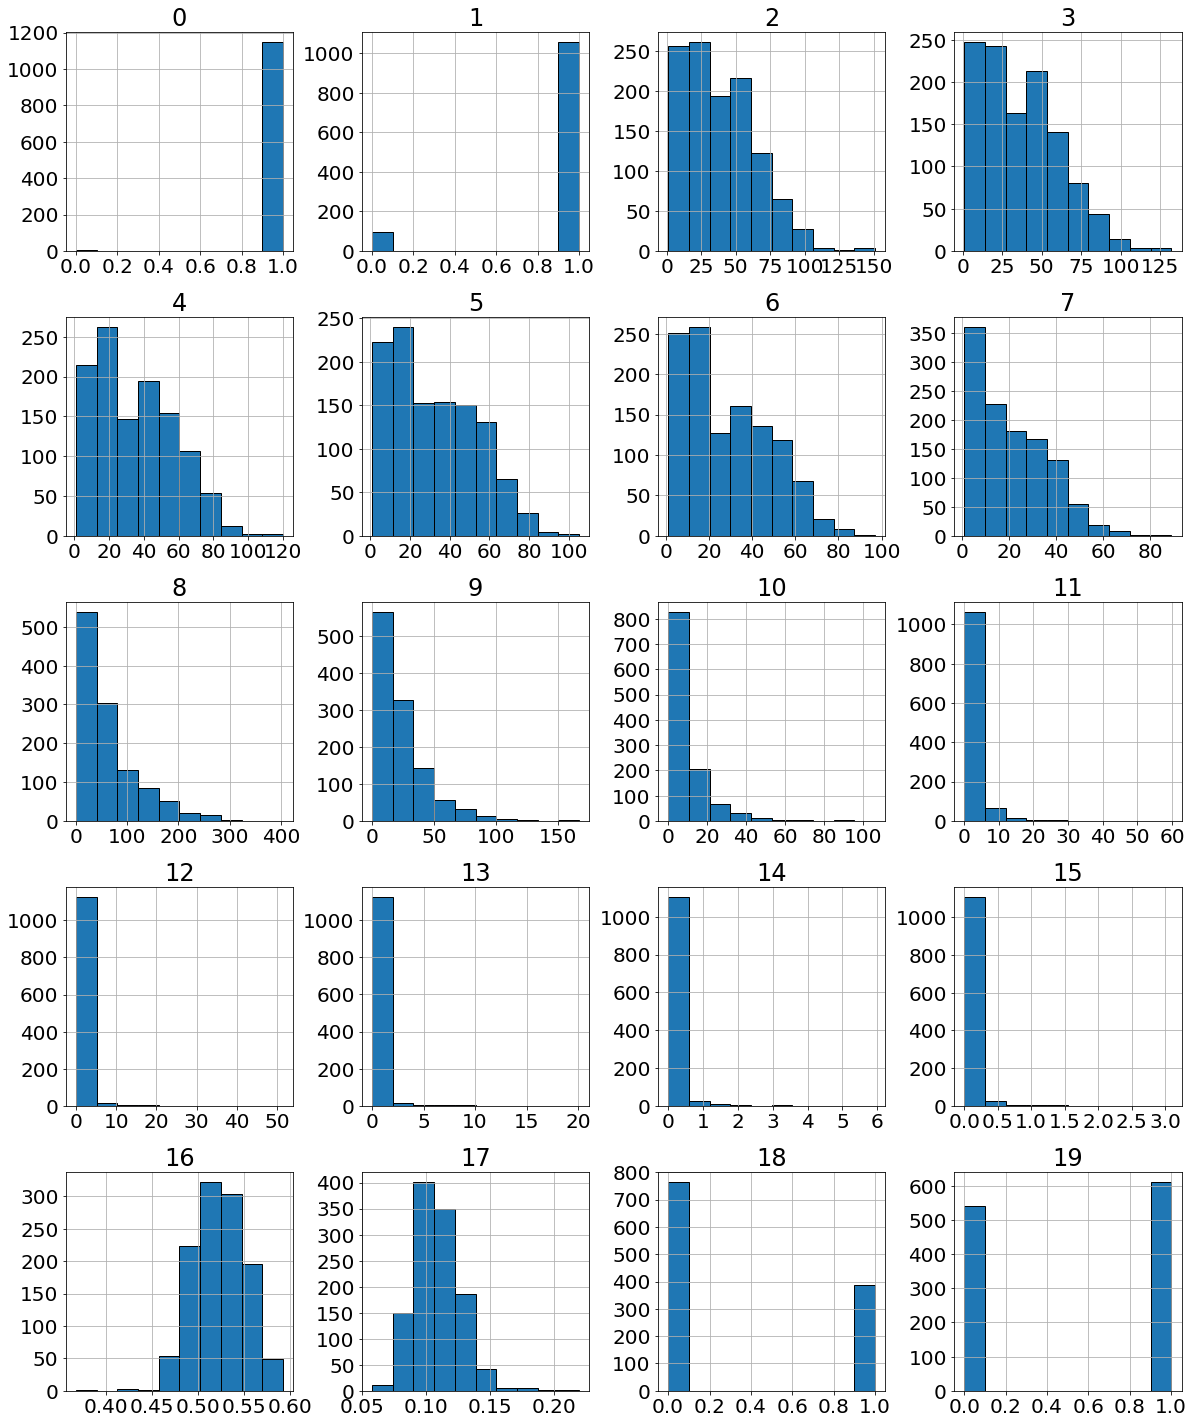

In [15]:
%matplotlib inline

fig= df.hist(xlabelsize=20,ylabelsize=20,ec="k",figsize=(20,25))
[x.title.set_size(24) for x in fig.ravel()]

All the features are highly skewed

In [16]:
df.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
dtype: int64

#### Dropping the NaN values

In [17]:
print(df.shape)
df=df.dropna()
df.shape

(1151, 20)


(1151, 20)

#### Applying standard scaling

In [19]:

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# scaler = MinMaxScaler(feature_range=(0, 1))
scaler = StandardScaler()
X2_Scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(X2_Scaled)
df_scaled.columns = df.columns


In [20]:
df.corr()

0     1     2     3     4     5     6     7     8     9    10    11  \
0   1.00 -0.02  0.04  0.04  0.03  0.04  0.03  0.03  0.06  0.06  0.04  0.03   
1  -0.02  1.00  0.05  0.05  0.05  0.06  0.06  0.06  0.06  0.05  0.05  0.04   
2   0.04  0.05  1.00  1.00  0.99  0.96  0.93  0.86 -0.23 -0.10 -0.04  0.10   
3   0.04  0.05  1.00  1.00  0.99  0.98  0.94  0.88 -0.24 -0.12 -0.06  0.09   
4   0.03  0.05  0.99  0.99  1.00  0.99  0.97  0.92 -0.28 -0.14 -0.09  0.06   
5   0.04  0.06  0.96  0.98  0.99  1.00  0.99  0.95 -0.31 -0.16 -0.11  0.03   
6   0.03  0.06  0.93  0.94  0.97  0.99  1.00  0.97 -0.35 -0.20 -0.15 -0.02   
7   0.03  0.06  0.86  0.88  0.92  0.95  0.97  1.00 -0.38 -0.22 -0.18 -0.06   
8   0.06  0.06 -0.23 -0.24 -0.28 -0.31 -0.35 -0.38  1.00  0.77  0.76  0.49   
9   0.06  0.05 -0.10 -0.12 -0.14 -0.16 -0.20 -0.22  0.77  1.00  0.92  0.62   
10  0.04  0.05 -0.04 -0.06 -0.09 -0.11 -0.15 -0.18  0.76  0.92  1.00  0.78   
11  0.03  0.04  0.10  0.09  0.06  0.03 -0.02 -0.06  0.49  0.62  0.78  1.00   
12  0.01  0.02  0.13  0.12  0.09  0.07  0.02 -0.01  0.16  0.26  0.38  0.83   
13  0.01  0.02  0.14  0.12  0.10  0.07  0.02 -0.01  0.13  0.22  0.33  0.76   
14  0.01  0.02  0.20  0.17  0.14  0.10  0.05  0.01  0.11  0.18  0.27  0.64   
15  0.01  0.02  0.21  0.19  0.16  0.12  0.07  0.03  0.08  0.14  0.21  0.52   
16 -0.02  0.00  0.00  0.00  0.00  0.00 -0.00 -0.00 -0.09 -0.13 -0.13 -0.17   
17 -0.07 -0.08  0.03  0.03  0.03  0.02  0.01 -0.01 -0.09 -0.09 -0.10 -0.09   
18 -0.05  0.01 -0.34 -0.36 -0.39 -0.41 -0.44 -0.44  0.39  0.29  0.28  0.17   
19  0.06 -0.08  0.29  0.27  0.23  0.20  0.16  0.13  0.06  0.00  0.04  0.10   

      12    13    14    15    16    17    18    19  
0   0.01  0.01  0.01  0.01 -0.02 -0.07 -0.05  0.06  
1   0.02  0.02  0.02  0.02  0.00 -0.08  0.01 -0.08  
2   0.13  0.14  0.20  0.21  0.00  0.03 -0.34  0.29  
3   0.12  0.12  0.17  0.19  0.00  0.03 -0.36  0.27  
4   0.09  0.10  0.14  0.16  0.00  0.03 -0.39  0.23  
5   0.07  0.07  0.10  0.12  0.00  0.02 -0.41  0.20  
6   0.02  0.02  0.05  0.07 -0.00  0.01 -0.44  0.16  
7  -0.01 -0.01  0.01  0.03 -0.00 -0.01 -0.44  0.13  
8   0.16  0.13  0.11  0.08 -0.09 -0.09  0.39  0.06  
9   0.26  0.22  0.18  0.14 -0.13 -0.09  0.29  0.00  
10  0.38  0.33  0.27  0.21 -0.13 -0.10  0.28  0.04  
11  0.83  0.76  0.64  0.52 -0.17 -0.09  0.17  0.10  
12  1.00  0.93  0.77  0.63 -0.15 -0.06  0.07  0.14  
13  0.93  1.00  0.91  0.78 -0.15 -0.06  0.05  0.15  
14  0.77  0.91  1.00  0.94 -0.12 -0.04  0.04  0.18  
15  0.63  0.78  0.94  1.00 -0.10 -0.02  0.03  0.18  
16 -0.15 -0.15 -0.12 -0.10  1.00 -0.13 -0.01  0.01  
17 -0.06 -0.06 -0.04 -0.02 -0.13  1.00 -0.08 -0.03  
18  0.07  0.05  0.04  0.03 -0.01 -0.08  1.00 -0.04  
19  0.14  0.15  0.18  0.18  0.01 -0.03 -0.04  1.00

## Correlation

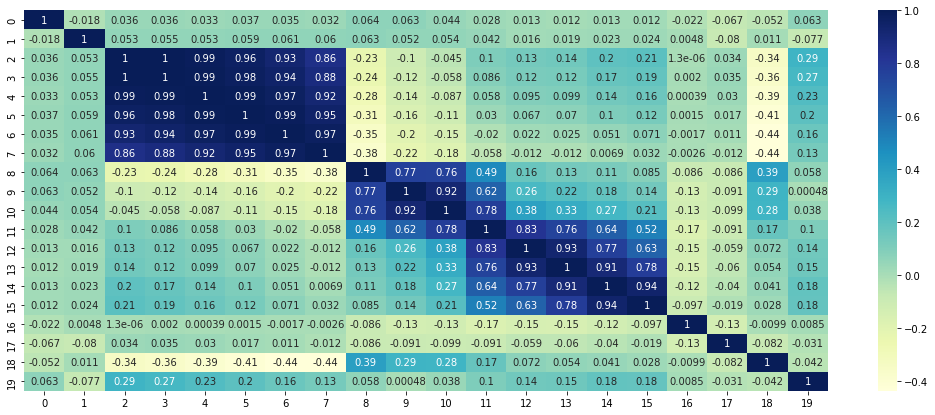

In [21]:
cor=df.corr()
plt.figure(figsize=(18, 7))
dataplot = sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

## Feature Selection

In [22]:
df.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
dtype: int64

### for df_scaled

In [23]:
df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19'],
      dtype='object')

In [24]:
dfs = pd.DataFrame()

X=df_scaled.drop(columns=['19'])
y=df['19']

trainX=X
trainy=y
testX=X
testy=y

discrete_features = X.dtypes == int


mi_scores_d = mutual_info_classif(trainX, trainy, discrete_features=discrete_features)
    
mi_scores_d = pd.Series(mi_scores_d, name="MI Scores", index=trainX.columns)


dfs['MI']=mi_scores_d

## Feature selection using random forrest and gradient boosting

clfRF = RandomForestClassifier(max_depth=5, max_features=4, min_samples_split=8,
                  n_estimators=100)#, random_state=0)
clfRF.fit(trainX, trainy)
importance_rf = pd.Series(clfRF.feature_importances_, index=trainX.columns)


clfGB = GradientBoostingClassifier(max_depth=2,n_estimators=50)#, random_state=0)
clfGB.fit(trainX, trainy)
importance_GB = pd.Series(clfGB.feature_importances_, index=trainX.columns)


clfdt = DecisionTreeClassifier(max_depth=5)
clfdt.fit(trainX, trainy)
importance_dt = pd.Series(clfdt.feature_importances_, index=trainX.columns)

cor=df_scaled.corr()


cor_target = abs(cor['19'])

cor_target = pd.Series(cor_target, name="Correlation", index=trainX.columns)

dfs['Decission_Tree']=importance_dt

dfs['Random_Forrest']=importance_rf

dfs['Gradient_Boosting']=importance_GB

# dfs['SVM']=importance_svm

dfs['Correlation_Default']=cor_target

dfs['sum']=dfs.sum(axis=1)

dfs.sort_values('sum',ascending=False)


MI  Decission_Tree  Random_Forrest  Gradient_Boosting  \
2  0.07            0.23            0.13               0.28   
14 0.06            0.33            0.13               0.30   
3  0.05            0.00            0.08               0.02   
15 0.08            0.02            0.10               0.01   
8  0.02            0.08            0.08               0.13   
4  0.06            0.00            0.06               0.00   
5  0.05            0.00            0.05               0.05   
11 0.04            0.12            0.03               0.01   
6  0.04            0.03            0.04               0.02   
13 0.06            0.03            0.05               0.00   
7  0.01            0.03            0.04               0.05   
12 0.03            0.03            0.04               0.01   
9  0.00            0.04            0.06               0.04   
17 0.01            0.04            0.03               0.02   
1  0.00            0.00            0.01               0.01   
10 0.00            0.00            0.04               0.02   
16 0.00            0.01            0.03               0.03   
0  0.00            0.00            0.00               0.00   
18 0.00            0.00            0.00               0.00   

    Correlation_Default  sum  
2                  0.29 1.01  
14                 0.18 1.01  
3                  0.27 0.42  
15                 0.18 0.39  
8                  0.06 0.36  
4                  0.23 0.36  
5                  0.20 0.35  
11                 0.10 0.31  
6                  0.16 0.30  
13                 0.15 0.29  
7                  0.13 0.25  
12                 0.14 0.24  
9                  0.00 0.14  
17                 0.03 0.13  
1                  0.08 0.10  
10                 0.04 0.10  
16                 0.01 0.09  
0                  0.06 0.06  
18                 0.04 0.05

#### for df

In [25]:
dfs = pd.DataFrame()


X=df.drop(columns=['19'])
y=df['19']


trainX=X
trainy=y
testX=X
testy=y

discrete_features = X.dtypes == int


mi_scores_d = mutual_info_regression(trainX, trainy, discrete_features=discrete_features)
    
mi_scores_d = pd.Series(mi_scores_d, name="MI Scores", index=trainX.columns)

dfs['MI']=mi_scores_d

## Feature selection using random forrest and gradient boosting

clfRF = RandomForestRegressor(max_depth=5, max_features=4, min_samples_split=8,
                  n_estimators=100)#, random_state=0)
clfRF.fit(trainX, trainy)
importance_rf = pd.Series(clfRF.feature_importances_, index=trainX.columns)


clfGB = GradientBoostingRegressor(max_depth=2,n_estimators=50)#, random_state=0)
clfGB.fit(trainX, trainy)
importance_GB = pd.Series(clfGB.feature_importances_, index=trainX.columns)


clfdt = DecisionTreeRegressor(max_depth=5)
clfdt.fit(trainX, trainy)
importance_dt = pd.Series(clfdt.feature_importances_, index=trainX.columns)

cor=df.corr()


cor_target = abs(cor['19'])

cor_target = pd.Series(cor_target, name="Correlation", index=trainX.columns)

dfs['Decission_Tree']=importance_dt

dfs['Random_Forrest']=importance_rf

dfs['Gradient_Boosting']=importance_GB


dfs['Correlation_Default']=cor_target

dfs['sum']=dfs.sum(axis=1)

dfs.sort_values('sum',ascending=False)


MI  Decission_Tree  Random_Forrest  Gradient_Boosting  \
2  0.37            0.19            0.13               0.31   
14 0.07            0.33            0.16               0.28   
3  0.32            0.04            0.09               0.01   
4  0.27            0.00            0.06               0.02   
5  0.20            0.00            0.05               0.02   
6  0.16            0.02            0.04               0.01   
7  0.12            0.04            0.04               0.05   
8  0.02            0.08            0.08               0.13   
11 0.04            0.12            0.04               0.01   
15 0.03            0.01            0.07               0.01   
13 0.04            0.03            0.06               0.00   
12 0.02            0.03            0.03               0.01   
9  0.00            0.04            0.04               0.05   
17 0.01            0.04            0.03               0.02   
1  0.01            0.00            0.01               0.01   
16 0.00            0.02            0.02               0.03   
10 0.00            0.00            0.03               0.01   
0  0.01            0.00            0.00               0.00   
18 0.02            0.00            0.00               0.00   

    Correlation_Default  sum  
2                  0.29 1.28  
14                 0.18 1.03  
3                  0.27 0.73  
4                  0.23 0.57  
5                  0.20 0.47  
6                  0.16 0.40  
7                  0.13 0.37  
8                  0.06 0.37  
11                 0.10 0.31  
15                 0.18 0.31  
13                 0.15 0.29  
12                 0.14 0.23  
9                  0.00 0.14  
17                 0.03 0.13  
1                  0.08 0.11  
16                 0.01 0.09  
10                 0.04 0.09  
0                  0.06 0.07  
18                 0.04 0.06

In [26]:
dfs.shape

(19, 6)

In [27]:
dfs_s=dfs[dfs['sum']>0.7]
dfs_s.shape

(3, 6)

In [28]:
dfs_s

MI  Decission_Tree  Random_Forrest  Gradient_Boosting  \
2  0.37            0.19            0.13               0.31   
3  0.32            0.04            0.09               0.01   
14 0.07            0.33            0.16               0.28   

    Correlation_Default  sum  
2                  0.29 1.28  
3                  0.27 0.73  
14                 0.18 1.03

In [29]:
dfs_s.index

Index(['2', '3', '14'], dtype='object')

### chosing the best top 3 features

In [30]:
# df_t=df[dfs_s.index]

df_ts=df_scaled[dfs_s.index] # scaled dataset

df_t=df[dfs_s.index] 

# df_tl=df_log[dfs_s.index]

## Making X,y

## Making train and test split

In [31]:
df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19'],
      dtype='object')

In [32]:
X.shape

(1151, 19)

#### for df

In [33]:

X=df_t
y=df['19']


offset = int(X.shape[0] * 0.7)

### splitting dataset into training and testing part.
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 64)



In [34]:
X.shape

(1151, 3)

In [35]:
y_train.shape

(805,)

In [36]:
X_train.shape

(805, 3)

#### for df_scaled

In [37]:
Xs=df_ts
ys=df_scaled['19']



offset = int(Xs.shape[0] * 0.7)

### splitting dataset into training and testing part.
Xs_train, ys_train = Xs[:offset], ys[:offset]
Xs_test, ys_test = Xs[offset:], ys[offset:]

In [38]:
Xs_train.shape

(805, 3)

In [39]:
df_t.describe()

2       3      14
count 1151.00 1151.00 1151.00
mean    38.43   36.91    0.09
std     25.62   24.11    0.40
min      1.00    1.00    0.00
25%     16.00   16.00    0.00
50%     35.00   35.00    0.00
75%     55.00   53.00    0.00
max    151.00  132.00    5.94

In [40]:
df_ts.describe()

2       3      14
count 1151.00 1151.00 1151.00
mean    -0.00   -0.00   -0.00
std      1.00    1.00    1.00
min     -1.46   -1.49   -0.21
25%     -0.88   -0.87   -0.21
50%     -0.13   -0.08   -0.21
75%      0.65    0.67   -0.20
max      4.40    3.95   14.68

In [41]:
X.describe()

2       3      14
count 1151.00 1151.00 1151.00
mean    38.43   36.91    0.09
std     25.62   24.11    0.40
min      1.00    1.00    0.00
25%     16.00   16.00    0.00
50%     35.00   35.00    0.00
75%     55.00   53.00    0.00
max    151.00  132.00    5.94

In [42]:
Xs.describe()

2       3      14
count 1151.00 1151.00 1151.00
mean    -0.00   -0.00   -0.00
std      1.00    1.00    1.00
min     -1.46   -1.49   -0.21
25%     -0.88   -0.87   -0.21
50%     -0.13   -0.08   -0.21
75%      0.65    0.67   -0.20
max      4.40    3.95   14.68

In [43]:
X_train.shape

(805, 3)

In [44]:
X_test.shape

(346, 3)

In [45]:
X.shape

(1151, 3)

In [46]:
X_train.shape

(805, 3)

## Using Lazy predict to rub regression models

### Making prediction on train-test dataset with lazy predict for df

In [47]:

reg = LazyClassifier(verbose=10, ignore_warnings=False, custom_metric=None)

models_1, predictions = reg.fit(X_train, X_test, y_train, y_test)


print(models_1)


 14%|█▍        | 4/29 [00:00<00:02, 10.94it/s]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.6127167630057804, 'Balanced Accuracy': 0.6240284106137765, 'ROC AUC': 0.6240284106137765, 'F1 Score': 0.5951379494117164, 'Time taken': 0.10452818870544434}
{'Model': 'BaggingClassifier', 'Accuracy': 0.6705202312138728, 'Balanced Accuracy': 0.671133744304476, 'ROC AUC': 0.6711337443044759, 'F1 Score': 0.670740523239939, 'Time taken': 0.03480100631713867}
{'Model': 'BernoulliNB', 'Accuracy': 0.6098265895953757, 'Balanced Accuracy': 0.612536853390512, 'ROC AUC': 0.6125368533905119, 'F1 Score': 0.6092560033283112, 'Time taken': 0.016383886337280273}
{'Model': 'CalibratedClassifierCV', 'Accuracy': 0.7167630057803468, 'Balanced Accuracy': 0.722326454033771, 'ROC AUC': 0.7223264540337712, 'F1 Score': 0.7143666410818962, 'Time taken': 0.12917590141296387}
CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)



 31%|███       | 9/29 [00:00<00:01, 12.91it/s]

{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.6502890173410405, 'Balanced Accuracy': 0.6519029750737069, 'ROC AUC': 0.6519029750737068, 'F1 Score': 0.6503386776735401, 'Time taken': 0.0247499942779541}
{'Model': 'DummyClassifier', 'Accuracy': 0.5260115606936416, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.3626291819933438, 'Time taken': 0.018465042114257812}
{'Model': 'ExtraTreeClassifier', 'Accuracy': 0.6271676300578035, 'Balanced Accuracy': 0.6296234253551327, 'ROC AUC': 0.6296234253551327, 'F1 Score': 0.6268094099531728, 'Time taken': 0.015847206115722656}
{'Model': 'ExtraTreesClassifier', 'Accuracy': 0.6647398843930635, 'Balanced Accuracy': 0.6665438220316269, 'ROC AUC': 0.6665438220316269, 'F1 Score': 0.6647398843930635, 'Time taken': 0.1504378318786621}
{'Model': 'GaussianNB', 'Accuracy': 0.6127167630057804, 'Balanced Accuracy': 0.6291543822031627, 'ROC AUC': 0.6291543822031627, 'F1 Score': 0.5727335110609398, 'Time taken': 0.011938333511352539}


 62%|██████▏   | 18/29 [00:00<00:00, 19.56it/s]

{'Model': 'KNeighborsClassifier', 'Accuracy': 0.6473988439306358, 'Balanced Accuracy': 0.6503618332886625, 'ROC AUC': 0.6503618332886626, 'F1 Score': 0.6467858910300373, 'Time taken': 0.025612592697143555}
{'Model': 'LabelPropagation', 'Accuracy': 0.6127167630057804, 'Balanced Accuracy': 0.6219177164299116, 'ROC AUC': 0.6219177164299116, 'F1 Score': 0.6014831173790711, 'Time taken': 0.030623435974121094}
{'Model': 'LabelSpreading', 'Accuracy': 0.6098265895953757, 'Balanced Accuracy': 0.6191704636826588, 'ROC AUC': 0.6191704636826588, 'F1 Score': 0.5981028972313415, 'Time taken': 0.03103327751159668}
{'Model': 'LinearDiscriminantAnalysis', 'Accuracy': 0.7052023121387283, 'Balanced Accuracy': 0.7122420262664164, 'ROC AUC': 0.7122420262664164, 'F1 Score': 0.700806206267113, 'Time taken': 0.03713393211364746}
{'Model': 'LinearSVC', 'Accuracy': 0.7138728323699421, 'Balanced Accuracy': 0.7204837845081747, 'ROC AUC': 0.7204837845081747, 'F1 Score': 0.7102129682157587, 'Time taken': 0.02146244


 72%|███████▏  | 21/29 [00:00<00:00, 20.95it/s]

{'Model': 'PassiveAggressiveClassifier', 'Accuracy': 0.6647398843930635, 'Balanced Accuracy': 0.6662422942910747, 'ROC AUC': 0.6662422942910747, 'F1 Score': 0.6648295021732311, 'Time taken': 0.06137728691101074}
{'Model': 'Perceptron', 'Accuracy': 0.5867052023121387, 'Balanced Accuracy': 0.6071428571428571, 'ROC AUC': 0.6071428571428571, 'F1 Score': 0.5157322602838124, 'Time taken': 0.02528095245361328}
{'Model': 'QuadraticDiscriminantAnalysis', 'Accuracy': 0.6589595375722543, 'Balanced Accuracy': 0.6743165371214151, 'ROC AUC': 0.6743165371214151, 'F1 Score': 0.6292602713846317, 'Time taken': 0.03133511543273926}



 83%|████████▎ | 24/29 [00:01<00:00, 17.15it/s]

{'Model': 'RandomForestClassifier', 'Accuracy': 0.6589595375722543, 'Balanced Accuracy': 0.6592401500938087, 'ROC AUC': 0.6592401500938085, 'F1 Score': 0.6591876277691696, 'Time taken': 0.1969742774963379}
{'Model': 'RidgeClassifier', 'Accuracy': 0.6820809248554913, 'Balanced Accuracy': 0.6878517823639775, 'ROC AUC': 0.6878517823639775, 'F1 Score': 0.679025654173659, 'Time taken': 0.03719377517700195}
{'Model': 'RidgeClassifierCV', 'Accuracy': 0.7052023121387283, 'Balanced Accuracy': 0.7119404985258644, 'ROC AUC': 0.7119404985258644, 'F1 Score': 0.7012283602247152, 'Time taken': 0.012357473373413086}
{'Model': 'SGDClassifier', 'Accuracy': 0.5751445086705202, 'Balanced Accuracy': 0.563588850174216, 'ROC AUC': 0.5635888501742159, 'F1 Score': 0.5524028614177996, 'Time taken': 0.016006946563720703}
{'Model': 'SVC', 'Accuracy': 0.6358381502890174, 'Balanced Accuracy': 0.6454033771106942, 'ROC AUC': 0.6454033771106942, 'F1 Score': 0.6245098323989892, 'Time taken': 0.0622406005859375}
Stackin

100%|██████████| 29/29 [00:01<00:00, 14.59it/s]

{'Model': 'XGBClassifier', 'Accuracy': 0.6734104046242775, 'Balanced Accuracy': 0.6732779415706245, 'ROC AUC': 0.6732779415706245, 'F1 Score': 0.6735879776599825, 'Time taken': 0.7162737846374512}
{'Model': 'LGBMClassifier', 'Accuracy': 0.6560693641618497, 'Balanced Accuracy': 0.6555883141248995, 'ROC AUC': 0.6555883141248995, 'F1 Score': 0.6561988875453071, 'Time taken': 0.07979035377502441}
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
CalibratedClassifierCV             0.72               0.72     0.72      0.71   
LinearSVC                          0.71               0.72     0.72      0.71   
LinearDiscriminantAnalysis         0.71               0.71     0.71      0.70   
RidgeClassifierCV                  0.71               0.71     0.71      0.70   
RidgeClassifier                    0.68               0.69     0.69      0.68   
QuadraticDiscriminantAnalysis      0.

### Lazy predict for df_scaled

In [48]:


reg = LazyClassifier(verbose=10, ignore_warnings=False, custom_metric=None)

models_1, predictions = reg.fit(Xs_train, Xs_test, y_train, y_test)

# models_1, predictions = reg.fit(X, X, y, y)

print(models_1)



 24%|██▍       | 7/29 [00:00<00:01, 19.38it/s]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.6127167630057804, 'Balanced Accuracy': 0.6240284106137765, 'ROC AUC': 0.6240284106137765, 'F1 Score': 0.5951379494117164, 'Time taken': 0.09770441055297852}
{'Model': 'BaggingClassifier', 'Accuracy': 0.6705202312138728, 'Balanced Accuracy': 0.671133744304476, 'ROC AUC': 0.6711337443044759, 'F1 Score': 0.670740523239939, 'Time taken': 0.03143501281738281}
{'Model': 'BernoulliNB', 'Accuracy': 0.6098265895953757, 'Balanced Accuracy': 0.612536853390512, 'ROC AUC': 0.6125368533905119, 'F1 Score': 0.6092560033283112, 'Time taken': 0.011756420135498047}
{'Model': 'CalibratedClassifierCV', 'Accuracy': 0.7167630057803468, 'Balanced Accuracy': 0.722326454033771, 'ROC AUC': 0.7223264540337712, 'F1 Score': 0.7143666410818962, 'Time taken': 0.06396198272705078}
CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)
{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.6502890173410405, 'Balanced Accuracy': 0.65190297

 45%|████▍     | 13/29 [00:00<00:00, 17.94it/s]

{'Model': 'ExtraTreesClassifier', 'Accuracy': 0.6647398843930635, 'Balanced Accuracy': 0.6665438220316269, 'ROC AUC': 0.6665438220316269, 'F1 Score': 0.6647398843930635, 'Time taken': 0.19069242477416992}
{'Model': 'GaussianNB', 'Accuracy': 0.6127167630057804, 'Balanced Accuracy': 0.6291543822031627, 'ROC AUC': 0.6291543822031627, 'F1 Score': 0.5727335110609398, 'Time taken': 0.01877284049987793}
{'Model': 'KNeighborsClassifier', 'Accuracy': 0.6445086705202312, 'Balanced Accuracy': 0.6476145805414097, 'ROC AUC': 0.6476145805414097, 'F1 Score': 0.6437866042932611, 'Time taken': 0.02454686164855957}
{'Model': 'LabelPropagation', 'Accuracy': 0.6127167630057804, 'Balanced Accuracy': 0.6219177164299116, 'ROC AUC': 0.6219177164299116, 'F1 Score': 0.6014831173790711, 'Time taken': 0.03442215919494629}
{'Model': 'LabelSpreading', 'Accuracy': 0.6098265895953757, 'Balanced Accuracy': 0.6191704636826588, 'ROC AUC': 0.6191704636826588, 'F1 Score': 0.5981028972313415, 'Time taken': 0.02437281608581


 62%|██████▏   | 18/29 [00:00<00:00, 21.85it/s]

{'Model': 'NuSVC', 'Accuracy': 0.6647398843930635, 'Balanced Accuracy': 0.6680514607343875, 'ROC AUC': 0.6680514607343876, 'F1 Score': 0.6639550994782533, 'Time taken': 0.04901456832885742}
{'Model': 'PassiveAggressiveClassifier', 'Accuracy': 0.6647398843930635, 'Balanced Accuracy': 0.6662422942910747, 'ROC AUC': 0.6662422942910747, 'F1 Score': 0.6648295021732311, 'Time taken': 0.011640548706054688}
{'Model': 'Perceptron', 'Accuracy': 0.5867052023121387, 'Balanced Accuracy': 0.6071428571428571, 'ROC AUC': 0.6071428571428571, 'F1 Score': 0.5157322602838124, 'Time taken': 0.013337135314941406}
{'Model': 'QuadraticDiscriminantAnalysis', 'Accuracy': 0.6589595375722543, 'Balanced Accuracy': 0.6743165371214151, 'ROC AUC': 0.6743165371214151, 'F1 Score': 0.6292602713846317, 'Time taken': 0.015237092971801758}



 76%|███████▌  | 22/29 [00:00<00:00, 20.44it/s]

{'Model': 'RandomForestClassifier', 'Accuracy': 0.6589595375722543, 'Balanced Accuracy': 0.6592401500938087, 'ROC AUC': 0.6592401500938085, 'F1 Score': 0.6591876277691696, 'Time taken': 0.18380284309387207}
{'Model': 'RidgeClassifier', 'Accuracy': 0.6820809248554913, 'Balanced Accuracy': 0.6878517823639775, 'ROC AUC': 0.6878517823639775, 'F1 Score': 0.679025654173659, 'Time taken': 0.013602256774902344}
{'Model': 'RidgeClassifierCV', 'Accuracy': 0.7052023121387283, 'Balanced Accuracy': 0.7119404985258644, 'ROC AUC': 0.7119404985258644, 'F1 Score': 0.7012283602247152, 'Time taken': 0.012904644012451172}
{'Model': 'SGDClassifier', 'Accuracy': 0.5751445086705202, 'Balanced Accuracy': 0.563588850174216, 'ROC AUC': 0.5635888501742159, 'F1 Score': 0.5524028614177996, 'Time taken': 0.010273218154907227}
{'Model': 'SVC', 'Accuracy': 0.6358381502890174, 'Balanced Accuracy': 0.6454033771106942, 'ROC AUC': 0.6454033771106942, 'F1 Score': 0.6245098323989892, 'Time taken': 0.04293060302734375}
Stac

100%|██████████| 29/29 [00:01<00:00, 21.49it/s]

{'Model': 'XGBClassifier', 'Accuracy': 0.6734104046242775, 'Balanced Accuracy': 0.6732779415706245, 'ROC AUC': 0.6732779415706245, 'F1 Score': 0.6735879776599825, 'Time taken': 0.3126349449157715}
{'Model': 'LGBMClassifier', 'Accuracy': 0.6560693641618497, 'Balanced Accuracy': 0.6555883141248995, 'ROC AUC': 0.6555883141248995, 'F1 Score': 0.6561988875453071, 'Time taken': 0.06276798248291016}
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
CalibratedClassifierCV             0.72               0.72     0.72      0.71   
LinearSVC                          0.71               0.72     0.72      0.71   
LinearDiscriminantAnalysis         0.71               0.71     0.71      0.70   
RidgeClassifierCV                  0.71               0.71     0.71      0.70   
RidgeClassifier                    0.68               0.69     0.69      0.68   
QuadraticDiscriminantAnalysis      0.

#### So we will use dataset without any scaling

### Making a datframe to store results

In [49]:
df_results_r1=pd.DataFrame(columns=['model_name','sampling/VI_method','Accuracy_train','AUC-ROC_train',
                                    'Accuracy_test','AUC-ROC_test','model_details'])

df_results_r1

Empty DataFrame
Columns: [model_name, sampling/VI_method, Accuracy_train, AUC-ROC_train, Accuracy_test, AUC-ROC_test, model_details]
Index: []

## Logistic Regression (ML)

### Making prediction on full dataset (no scaling) with Linear Regression on df

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 64)

reg = LogisticRegression()
reg.fit(X_train, y_train)

## for train data

y_p=reg.predict(X_train)
md_probs = reg.predict_proba(X_train)
md_probs = md_probs[:,1]
md_auc_train = roc_auc_score(y_train, md_probs)
# md_auc_train = roc_auc_score(y_train, md_probs,multi_class='ovr')
print( "Logistic Regression AUC-ROC for train data : ", md_auc_train)
accuracy_train=accuracy_score(y_train, y_p)
print('Logistic Regression accuracy for train data : ',accuracy_train)


# for test data

y_p=reg.predict(X_test)
md_probs = reg.predict_proba(X_test)
md_probs = md_probs[:,1]
md_auc_test = roc_auc_score(y_test, md_probs)
# md_auc_test = roc_auc_score(y_test, md_probs,multi_class='ovr')
print( "Logistic Regression AUC-ROC for test data : ", md_auc_test)
accuracy_test=accuracy_score(y_test, y_p)
print('Logistic Regression accuracy for test data: ',accuracy_test)


df_results_r1= df_results_r1.append({'model_name':'Logistic Regression-tain/test dataste','sampling/VI_method':'NA',
                                     'Accuracy_train':accuracy_train, 'AUC-ROC_train':md_auc_train,
                                     'Accuracy_test':accuracy_test, 'AUC-ROC_test':md_auc_test,'model_details':reg},ignore_index=True)


Logistic Regression AUC-ROC for train data :  0.7789515449089918
Logistic Regression accuracy for train data :  0.7204968944099379
Logistic Regression AUC-ROC for test data :  0.7767187081211471
Logistic Regression accuracy for test data:  0.7196531791907514


In [52]:
df_results_r1

model_name sampling/VI_method  Accuracy_train  \
0  Logistic Regression-tain/test dataste                 NA            0.72   

   AUC-ROC_train  Accuracy_test  AUC-ROC_test         model_details  
0           0.78           0.72          0.78  LogisticRegression()

### LR on train test split on df_scaled

In [53]:
from sklearn.linear_model import LinearRegression


# Xs_train, Xs_test, ys_train, ys_test = train_test_split(X, y, test_size = 0.2, random_state = 64)

reg = LogisticRegression()
reg.fit(Xs_train, y_train)


## for train data

y_p=reg.predict(Xs_train)
md_probs = reg.predict_proba(Xs_train)
md_probs = md_probs[:,1]
md_auc_train = roc_auc_score(y_train, md_probs)
# md_auc_train = roc_auc_score(y_train, md_probs,multi_class='ovr')
print( "Logistic Regression AUC-ROC for train data : ", md_auc_train)
accuracy_train=accuracy_score(y_train, y_p)
print('Logistic Regression accuracy for train data : ',accuracy_train)


## for test data

y_p=reg.predict(Xs_test)
md_probs = reg.predict_proba(Xs_test)
md_probs = md_probs[:,1]
md_auc_test = roc_auc_score(y_test, md_probs)
# md_auc_test = roc_auc_score(y_test, md_probs,multi_class='ovr')
print( "Logistic Regression AUC-ROC for test data : ", md_auc_test)
accuracy_test=accuracy_score(y_test, y_p)
print('Logistic Regression accuracy for test data: ',accuracy_test)


df_results_r1= df_results_r1.append({'model_name':'Logistic Regression-tain/test dataste','sampling/VI_method':'NA',
                                     'Accuracy_train':accuracy_train, 'AUC-ROC_train':md_auc_train,
                                     'Accuracy_test':accuracy_test, 'AUC-ROC_test':md_auc_test,'model_details':reg},ignore_index=True)


Logistic Regression AUC-ROC for train data :  0.7380226156821902
Logistic Regression accuracy for train data :  0.6596273291925466
Logistic Regression AUC-ROC for test data :  0.7328966764942374
Logistic Regression accuracy for test data:  0.6560693641618497


In [54]:
df_results_r1

model_name sampling/VI_method  Accuracy_train  \
0  Logistic Regression-tain/test dataste                 NA            0.72   
1  Logistic Regression-tain/test dataste                 NA            0.66   

   AUC-ROC_train  Accuracy_test  AUC-ROC_test         model_details  
0           0.78           0.72          0.78  LogisticRegression()  
1           0.74           0.66          0.73  LogisticRegression()

array([[<AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>],
       [<AxesSubplot:title={'center':'14'}>, <AxesSubplot:>]],
      dtype=object)

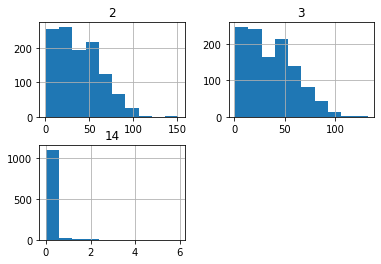

In [55]:
X.hist()

array([[<AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>],
       [<AxesSubplot:title={'center':'14'}>, <AxesSubplot:>]],
      dtype=object)

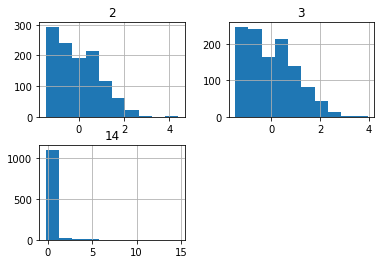

In [56]:
Xs.hist()

#### we will use normal df dataset without any scaling

#### Making variables for pymc models

In [58]:

Xv=X.values
yv=y.values
Xv_train=X_train.values
Xv_test=X_test.values
print(Xv_train.shape,Xv_test.shape)
# type(Xv)
# type(X)
yv_train=y_train.values
yv_test=y_test.values
print(yv_train.shape,yv_test.shape)


(805, 3) (346, 3)
(805,) (346,)


In [59]:
Xs.shape

(1151, 3)

In [60]:
Xsv=Xs.values
ysv=y.values
Xsv_train=Xs_train.values
Xsv_test=Xs_test.values
print(Xsv_train.shape,Xsv_test.shape)

ysv_train=ys_train.values
ysv_test=ys_test.values

(805, 3) (346, 3)


### making vars for prior for each feature for df

In [61]:
X.columns

Index(['2', '3', '14'], dtype='object')

### making vars for prior for each feature for df_scaled

### Selection of priors



## Applying MCMC

#### Note: We have used slice as the starting  sampling method to chose our best prior as it is the fastest sampler and as NUTS was giving chain breaking error

### Doing Logistic Regression using MCMC

In [62]:
yv_train.shape

(805,)

#### Using generic priors

In [63]:
Xv_train.shape

(805, 3)

### Generic prior 1

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Slice: [beta]
>Slice: [alpha]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 26 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


Logistic Regression AUC-ROC :  0.7900920001983831
Logistic Regression accuracy :  0.7055900621118012
Logistic Regression accuracy for test data :  0.5260115606936416
Logistic Regression AUC-ROC for test data :  0.6719545698204235


'0.71'

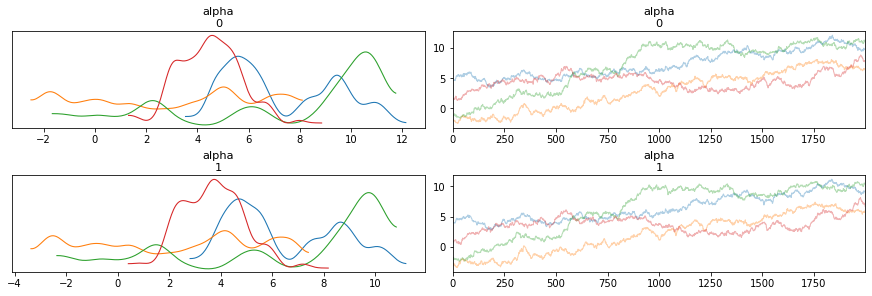

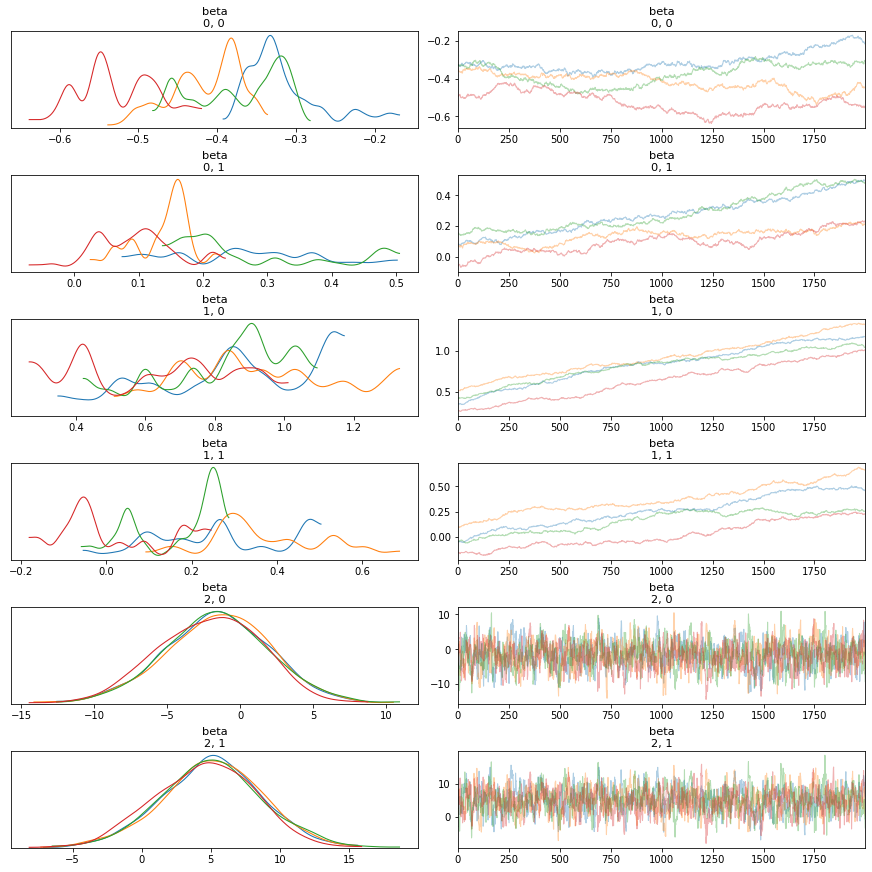

In [64]:
import theano as tt
tt.config.gcc.cxxflags = "-Wno-c++11-narrowing"

with pm.Model() as model_mclass:
    alpha = pm.Normal('alpha', mu=0, sd=5, shape=2)
    beta = pm.Normal('beta', mu=0, sd=5, shape=(3,2))
    μ = pm.Deterministic('μ', alpha + pm.math.dot(Xv_train, beta))
    θ = tt.tensor.nnet.softmax(μ)
    #θ = pm.math.exp(μ)/pm.math.sum(pm.math.exp(μ), axis=0)
    yl = pm.Categorical('yl', p=θ, observed=yv_train)
    
    step = pm.Slice()
#     step = pm.Metropolis()
#     step = pm.HamiltonianMC()
    trace_s = pm.sample(2000,step)
#     trace_s = pm.sample(2000,step, tune=1000)
    
#     trace_s = pm.sample(2000)

data_pred = trace_s['μ'].mean(0)
y_pred = [np.exp(point)/np.sum(np.exp(point), axis=0) for point in data_pred]

p=y_pred
p=np.array(p)
md_probs = p[:,1]
md_auc_train = roc_auc_score(yv_train,md_probs)
# md_auc_train = roc_auc_score(yv_train, p,multi_class='ovr')
print( "Logistic Regression AUC-ROC : ", md_auc_train)

accuracy_train=accuracy_score(yv_train, np.rint(md_probs))
print( "Logistic Regression accuracy : ", accuracy_train)


az.plot_trace(trace_s, var_names=['alpha'])
az.plot_trace(trace_s, var_names=['beta'])
f'{np.sum(yv_train == np.argmax(y_pred, axis=1)) / len(yv_train):.2f}'


## Calculating the probs for y=1
a=trace_s['alpha']
a=np.mean(a,0)
alph=a[1]

b=trace_s['beta']
b=np.mean(b,0)
bet=b[:,1]

y_mu = alph + bet[0]*Xv_test[:,0] + bet[1]*Xv_test[:,1]+ bet[2]*Xv_test[:,2]

ep=(1/(1+np.exp(-y_mu)))

dy=pd.DataFrame({'test_y':yv_test,'predicted_y':ep})
dy.head()

dy.replace([np.inf, -np.inf], np.nan, inplace=True)

dy=dy.dropna()
dy.shape

try:

    md_auc_test = roc_auc_score(dy['test_y'], dy['predicted_y'])
    # md_auc_test

    accuracy_test=accuracy_score(dy['test_y'], np.rint(dy['predicted_y']))
    print( "Logistic Regression accuracy for test data : ",accuracy_test)

    print( "Logistic Regression AUC-ROC for test data : ", md_auc_test)
    
except:
    md_auc_test = 'NA'
    accuracy_test='NA'



df_results_r1= df_results_r1.append({'model_name':'Logistic Regression-tain/test dataste','sampling/VI_method':'Slice',
                                     'Accuracy_test':accuracy_test, 'AUC-ROC_test':md_auc_test,
                                     'Accuracy_train':accuracy_train, 'AUC-ROC_train':md_auc_train,
                                     'model_details':model_mclass},ignore_index=True)

f'{np.sum(yv_train == np.argmax(y_pred, axis=1)) / len(yv_train):.2f}'


In [65]:
df_results_r1

model_name sampling/VI_method  Accuracy_train  \
0  Logistic Regression-tain/test dataste                 NA            0.72   
1  Logistic Regression-tain/test dataste                 NA            0.66   
2  Logistic Regression-tain/test dataste              Slice            0.71   

   AUC-ROC_train  Accuracy_test  AUC-ROC_test  \
0           0.78           0.72          0.78   
1           0.74           0.66          0.73   
2           0.79           0.53          0.67   

                                  model_details  
0                          LogisticRegression()  
1                          LogisticRegression()  
2  <pymc3.model.Model object at 0x7fd7dc44b890>

#### Generic piror 2

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Slice: [beta]
>Slice: [alpha]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 25 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


Logistic Regression AUC-ROC :  0.7885235332043843
Logistic Regression accuracy :  0.7055900621118012
Logistic Regression accuracy for test data :  0.5260115606936416
Logistic Regression AUC-ROC for test data :  0.6647179040471722


'0.71'

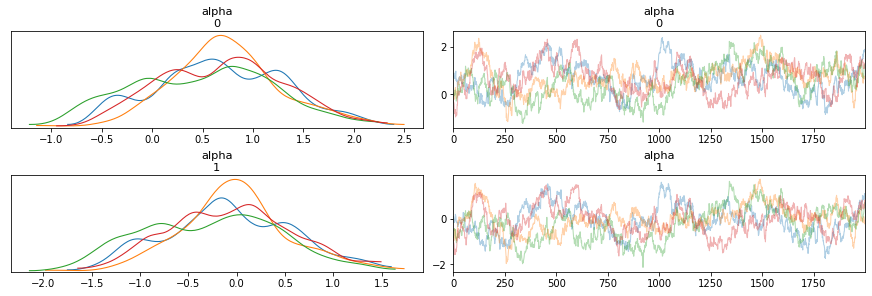

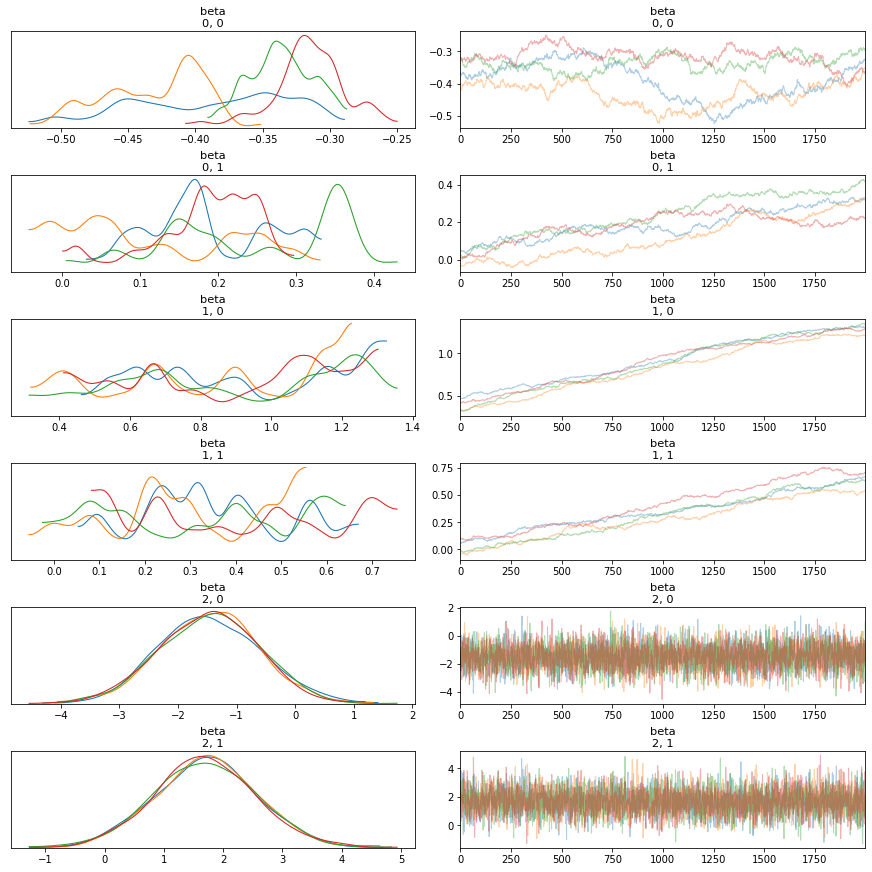

In [66]:
import theano as tt
tt.config.gcc.cxxflags = "-Wno-c++11-narrowing"

with pm.Model() as model_mclass:
    alpha = pm.Normal('alpha', mu=0, sd=1, shape=2)
    beta = pm.Normal('beta', mu=0, sd=1, shape=(3,2))
    μ = pm.Deterministic('μ', alpha + pm.math.dot(Xv_train, beta))
    θ = tt.tensor.nnet.softmax(μ)
    #θ = pm.math.exp(μ)/pm.math.sum(pm.math.exp(μ), axis=0)
    yl = pm.Categorical('yl', p=θ, observed=yv_train)
    
    step = pm.Slice()
    trace_s = pm.sample(2000,step)
#     trace_s = pm.sample(2000,step, tune=1000)
    
#     trace_s = pm.sample(2000)

data_pred = trace_s['μ'].mean(0)
y_pred = [np.exp(point)/np.sum(np.exp(point), axis=0) for point in data_pred]

p=y_pred
p=np.array(p)
md_probs = p[:,1]
md_auc_train = roc_auc_score(yv_train, md_probs)
print( "Logistic Regression AUC-ROC : ", md_auc_train)

accuracy_train=accuracy_score(yv_train, np.rint(md_probs))
print( "Logistic Regression accuracy : ", accuracy_train)


az.plot_trace(trace_s, var_names=['alpha'])
az.plot_trace(trace_s, var_names=['beta'])



## Calculating the probs for y=1
a=trace_s['alpha']
a=np.mean(a,0)
alph=a[1]

b=trace_s['beta']
b=np.mean(b,0)
bet=b[:,1]

y_mu = alph + bet[0]*Xv_test[:,0] + bet[1]*Xv_test[:,1]+ bet[2]*Xv_test[:,2]

ep=(1/(1+np.exp(-y_mu)))

dy=pd.DataFrame({'test_y':yv_test,'predicted_y':ep})
dy.head()

dy.replace([np.inf, -np.inf], np.nan, inplace=True)

dy=dy.dropna()
dy.shape

try:

    md_auc_test = roc_auc_score(dy['test_y'], dy['predicted_y'])
    # md_auc_test

    accuracy_test=accuracy_score(dy['test_y'], np.rint(dy['predicted_y']))
    print( "Logistic Regression accuracy for test data : ",accuracy_test)

    print( "Logistic Regression AUC-ROC for test data : ", md_auc_test)
    
except:
    md_auc_test = 'NA'
    accuracy_test='NA'


df_results_r1= df_results_r1.append({'model_name':'Logistic Regression-tain/test dataste','sampling/VI_method':'Slice',
                                     'Accuracy_test':accuracy_test, 'AUC-ROC_test':md_auc_test,
                                     'Accuracy_train':accuracy_train, 'AUC-ROC_train':md_auc_train,
                                     'model_details':model_mclass},ignore_index=True)


f'{np.sum(yv_train == np.argmax(y_pred, axis=1)) / len(yv_train):.2f}'

#### Using specific priors

array([[<AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>],
       [<AxesSubplot:title={'center':'14'}>, <AxesSubplot:>]],
      dtype=object)

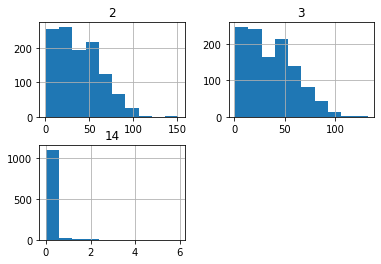

In [67]:
X.hist()

#### the features seem unifrom stable hence we can assume prior normal distribution

In [68]:
X.describe()

2       3      14
count 1151.00 1151.00 1151.00
mean    38.43   36.91    0.09
std     25.62   24.11    0.40
min      1.00    1.00    0.00
25%     16.00   16.00    0.00
50%     35.00   35.00    0.00
75%     55.00   53.00    0.00
max    151.00  132.00    5.94

In [69]:
y.describe()

count   1151.00
mean       0.53
std        0.50
min        0.00
25%        0.00
50%        1.00
75%        1.00
max        1.00
Name: 19, dtype: float64

#### Specific prior : with means and standard deviations based on features mean

In [70]:
import theano as tt
tt.config.gcc.cxxflags = "-Wno-c++11-narrowing"

with pm.Model() as model_mclass:
    alpha = pm.Normal('alpha', mu=0.5, sd=1, shape=2)
    beta = pm.Normal('beta', mu=40, sd=30, shape=(3,2))
    μ = pm.Deterministic('μ', alpha + pm.math.dot(Xv_train, beta))
    θ = tt.tensor.nnet.softmax(μ)
    #θ = pm.math.exp(μ)/pm.math.sum(pm.math.exp(μ), axis=0)
    yl = pm.Categorical('yl', p=θ, observed=yv_train)
    
    step = pm.Slice()
    trace_s = pm.sample(2000,step)
#     trace_s = pm.sample(2000,step, tune=1000)
    
#     trace_s = pm.sample(2000)

data_pred = trace_s['μ'].mean(0)
y_pred = [np.exp(point)/np.sum(np.exp(point), axis=0) for point in data_pred]

p=y_pred
p=np.array(p)
md_probs = p[:,1]
md_auc_train = roc_auc_score(yv_train, md_probs)
print( "Logistic Regression AUC-ROC : ", md_auc_train)

accuracy_train=accuracy_score(yv_train, np.rint(md_probs))
print( "Logistic Regression accuracy : ", accuracy_train)


az.plot_trace(trace_s, var_names=['alpha'])
az.plot_trace(trace_s, var_names=['beta'])
f'{np.sum(yv_train == np.argmax(y_pred, axis=1)) / len(yv_train):.2f}'



## Calculating the probs for y=1
a=trace_s['alpha']
a=np.mean(a,0)
alph=a[1]

b=trace_s['beta']
b=np.mean(b,0)
bet=b[:,1]

y_mu = alph + bet[0]*Xv_test[:,0] + bet[1]*Xv_test[:,1]+ bet[2]*Xv_test[:,2]
ep=(1/(1+np.exp(-y_mu)))

dy=pd.DataFrame({'test_y':yv_test,'predicted_y':ep})

dy.head()

dy.replace([np.inf, -np.inf], np.nan, inplace=True)

dy=dy.dropna()
dy.shape

try:

    md_auc_test = roc_auc_score(dy['test_y'], dy['predicted_y'])
    # md_auc_test

    accuracy_test=accuracy_score(dy['test_y'], np.rint(dy['predicted_y']))
    print( "Logistic Regression accuracy for test data : ",accuracy_test)

    print( "Logistic Regression AUC-ROC for test data : ", md_auc_test)
    
except:
    md_auc_test = 'NA'
    accuracy_test='NA'



df_results_r1= df_results_r1.append({'model_name':'Logistic Regression-tain/test dataste','sampling/VI_method':'Slice',
                                     'Accuracy_test':accuracy_test, 'AUC-ROC_test':md_auc_test,
                                     'Accuracy_train':accuracy_train, 'AUC-ROC_train':md_auc_train,
                                     'model_details':model_mclass},ignore_index=True)


f'{np.sum(yv_train == np.argmax(y_pred, axis=1)) / len(yv_train):.2f}'

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Slice: [beta]
>Slice: [alpha]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 26 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [71]:
Xs.describe()

2       3      14
count 1151.00 1151.00 1151.00
mean    -0.00   -0.00   -0.00
std      1.00    1.00    1.00
min     -1.46   -1.49   -0.21
25%     -0.88   -0.87   -0.21
50%     -0.13   -0.08   -0.21
75%      0.65    0.67   -0.20
max      4.40    3.95   14.68

### Now applying model on dataset with Standard Scalar transformation

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Slice: [beta]
>Slice: [alpha]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 21 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


Logistic Regression AUC-ROC :  0.7576253533700341
Logistic Regression accuracy :  0.6919254658385093
Logistic Regression accuracy for test data :  0.630057803468208
Logistic Regression AUC-ROC for test data :  0.6962778075582954


'0.69'

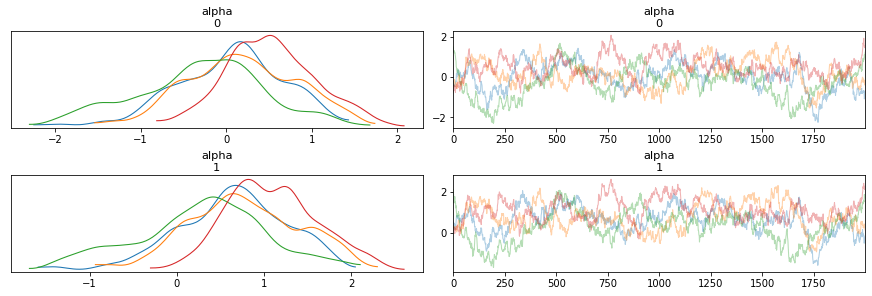

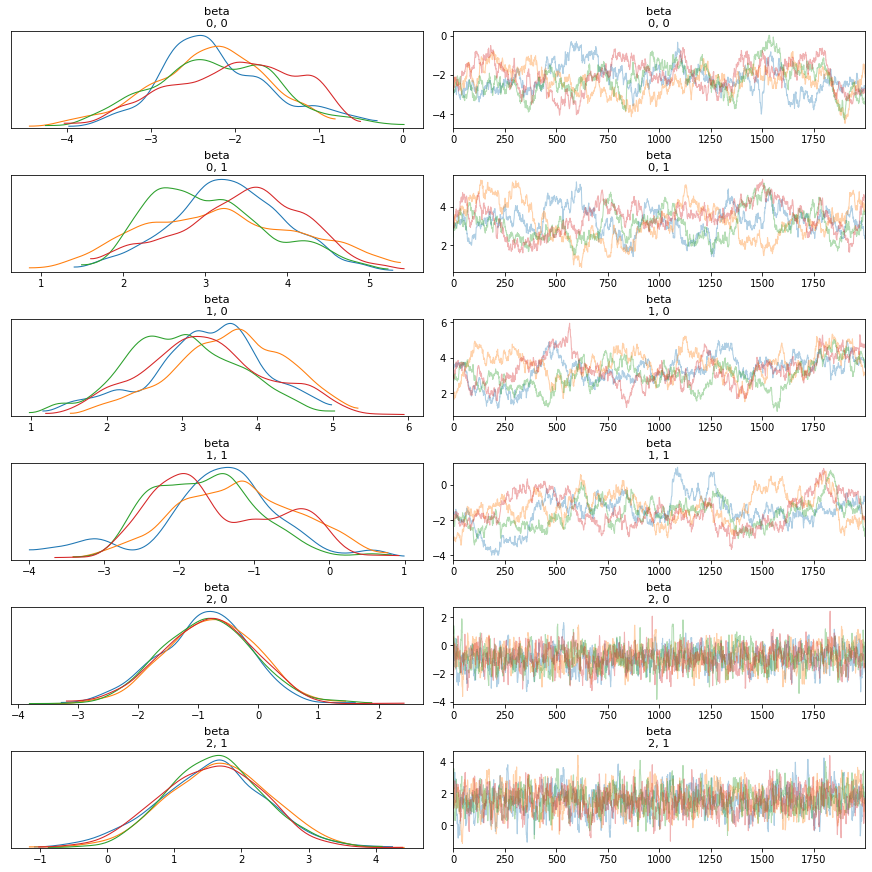

In [72]:
import theano as tt
tt.config.gcc.cxxflags = "-Wno-c++11-narrowing"

with pm.Model() as model_mclass:
    alpha = pm.Normal('alpha', mu=0, sd=1, shape=2)
    beta = pm.Normal('beta', mu=0, sd=1, shape=(3,2))
    μ = pm.Deterministic('μ', alpha + pm.math.dot(Xsv_train, beta))
    θ = tt.tensor.nnet.softmax(μ)
    #θ = pm.math.exp(μ)/pm.math.sum(pm.math.exp(μ), axis=0)
    yl = pm.Categorical('yl', p=θ, observed=yv_train)
    
    step = pm.Slice()
    trace_s = pm.sample(2000,step)
#     trace_s = pm.sample(2000,step, tune=1000)
    
#     trace_s = pm.sample(2000)

data_pred = trace_s['μ'].mean(0)
y_pred = [np.exp(point)/np.sum(np.exp(point), axis=0) for point in data_pred]

p=y_pred
p=np.array(p)
md_probs = p[:,1]
md_auc_train = roc_auc_score(yv_train, md_probs)
print( "Logistic Regression AUC-ROC : ", md_auc_train)

accuracy_train=accuracy_score(yv_train, np.rint(md_probs))
print( "Logistic Regression accuracy : ", accuracy_train)


az.plot_trace(trace_s, var_names=['alpha'])
az.plot_trace(trace_s, var_names=['beta'])
f'{np.sum(yv_train == np.argmax(y_pred, axis=1)) / len(yv_train):.2f}'



## Calculating the probs for y=1
a=trace_s['alpha']
a=np.mean(a,0)
alph=a[1]

b=trace_s['beta']
b=np.mean(b,0)
bet=b[:,1]

y_mu = alph + bet[0]*Xsv_test[:,0] + bet[1]*Xsv_test[:,1]+ bet[2]*Xsv_test[:,2]
ep=(1/(1+np.exp(-y_mu)))


dy=pd.DataFrame({'test_y':yv_test,'predicted_y':ep})


# dy=pd.DataFrame({'test_y':yv_test,'predicted_y':y_p})
dy.head()

dy.replace([np.inf, -np.inf], np.nan, inplace=True)

dy=dy.dropna()
dy.shape

try:

    md_auc_test = roc_auc_score(dy['test_y'], dy['predicted_y'])
    # md_auc_test

    accuracy_test=accuracy_score(dy['test_y'], np.rint(dy['predicted_y']))
    print( "Logistic Regression accuracy for test data : ",accuracy_test)

    print( "Logistic Regression AUC-ROC for test data : ", md_auc_test)
    
except:
    md_auc_test = 'NA'
    accuracy_test='NA'



df_results_r1= df_results_r1.append({'model_name':'Logistic Regression-tain/test dataste','sampling/VI_method':'Slice',
                                     'Accuracy_test':accuracy_test, 'AUC-ROC_test':md_auc_test,
                                     'Accuracy_train':accuracy_train, 'AUC-ROC_train':md_auc_train,
                                     'model_details':model_mclass},ignore_index=True)


f'{np.sum(yv_train == np.argmax(y_pred, axis=1)) / len(yv_train):.2f}'

In [73]:
df_results_r1

model_name sampling/VI_method  Accuracy_train  \
0  Logistic Regression-tain/test dataste                 NA            0.72   
1  Logistic Regression-tain/test dataste                 NA            0.66   
2  Logistic Regression-tain/test dataste              Slice            0.71   
3  Logistic Regression-tain/test dataste              Slice            0.71   
4  Logistic Regression-tain/test dataste              Slice            0.69   

   AUC-ROC_train  Accuracy_test  AUC-ROC_test  \
0           0.78           0.72          0.78   
1           0.74           0.66          0.73   
2           0.79           0.53          0.67   
3           0.79           0.53          0.66   
4           0.76           0.63          0.70   

                                  model_details  
0                          LogisticRegression()  
1                          LogisticRegression()  
2  <pymc3.model.Model object at 0x7fd7dc44b890>  
3  <pymc3.model.Model object at 0x7fd79fa43f90>  
4  <pymc3.model.Model object at 0x7fd79cce5850>

In [74]:
df_results_r1.tail()

model_name sampling/VI_method  Accuracy_train  \
0  Logistic Regression-tain/test dataste                 NA            0.72   
1  Logistic Regression-tain/test dataste                 NA            0.66   
2  Logistic Regression-tain/test dataste              Slice            0.71   
3  Logistic Regression-tain/test dataste              Slice            0.71   
4  Logistic Regression-tain/test dataste              Slice            0.69   

   AUC-ROC_train  Accuracy_test  AUC-ROC_test  \
0           0.78           0.72          0.78   
1           0.74           0.66          0.73   
2           0.79           0.53          0.67   
3           0.79           0.53          0.66   
4           0.76           0.63          0.70   

                                  model_details  
0                          LogisticRegression()  
1                          LogisticRegression()  
2  <pymc3.model.Model object at 0x7fd7dc44b890>  
3  <pymc3.model.Model object at 0x7fd79fa43f90>  
4  <pymc3.model.Model object at 0x7fd79cce5850>

### From the results based on them we see that model with the specific prior on standard scalar transformation dataset performed best. the mean and sd based on dataset

#### We will use this model for further analysis

## Making a MCMC function for our best models

In [76]:
def model_mcmc(sampling):
    
    
    import theano as tt
    tt.config.gcc.cxxflags = "-Wno-c++11-narrowing"

    with pm.Model() as model_mclass:
        alpha = pm.Normal('alpha', mu=0, sd=1, shape=2)
        beta = pm.Normal('beta', mu=0, sd=1, shape=(3,2))
        μ = pm.Deterministic('μ', alpha + pm.math.dot(Xsv_train, beta))
        θ = tt.tensor.nnet.softmax(μ)
        #θ = pm.math.exp(μ)/pm.math.sum(pm.math.exp(μ), axis=0)
        yl = pm.Categorical('yl', p=θ, observed=yv_train)
        
        
        if sampling == 'HMC':
            step = pm.HamiltonianMC()
            
        elif sampling == 'metropolis':
            step = pm.Metropolis()
            
        elif sampling == 'slice':
            step = pm.Slice()
            
        elif sampling == 'NUTS':
            step = pm.NUTS()
        

        trace_s = pm.sample(2000,step)


    data_pred = trace_s['μ'].mean(0)
    y_pred = [np.exp(point)/np.sum(np.exp(point), axis=0) for point in data_pred]

    p=y_pred
    p=np.array(p)
    md_probs = p[:,1]
    md_auc_train = roc_auc_score(yv_train, md_probs)
    print( "Logistic Regression AUC-ROC : ", md_auc_train)

    accuracy_train=accuracy_score(yv_train, np.rint(md_probs))
    print( "Logistic Regression accuracy : ", accuracy_train)


    az.plot_trace(trace_s, var_names=['alpha'])
    az.plot_trace(trace_s, var_names=['beta'])
    f'{np.sum(yv_train == np.argmax(y_pred, axis=1)) / len(yv_train):.2f}'



    ## Calculating the probs for y=1
    a=trace_s['alpha']
    a=np.mean(a,0)
    alph=a[1]

    b=trace_s['beta']
    b=np.mean(b,0)
    bet=b[:,1]

    y_mu = alph + bet[0]*Xsv_test[:,0] + bet[1]*Xsv_test[:,1]+ bet[2]*Xsv_test[:,2]
    ep=(1/(1+np.exp(-y_mu)))


    dy=pd.DataFrame({'test_y':yv_test,'predicted_y':ep})


    dy.head()

    dy.replace([np.inf, -np.inf], np.nan, inplace=True)

    dy=dy.dropna()
    dy.shape

    try:

        md_auc_test = roc_auc_score(dy['test_y'], dy['predicted_y'])
        # md_auc_test

        accuracy_test=accuracy_score(dy['test_y'], np.rint(dy['predicted_y']))
        print( "Logistic Regression accuracy for test data : ",accuracy_test)

        print( "Logistic Regression AUC-ROC for test data : ", md_auc_test)

    except:
        md_auc_test = 'NA'
        accuracy_test='NA'
        
    global df_results_r1



    df_results_r1= df_results_r1.append({'model_name':str(sampling)+' MLR-standard scalar-train/test datastet (S)',
                                         'sampling/VI_method':sampling,
                                         'Accuracy_test':accuracy_test, 'AUC-ROC_test':md_auc_test,
                                         'Accuracy_train':accuracy_train, 'AUC-ROC_train':md_auc_train,
                                         'model_details':model_mclass},ignore_index=True)


    f'{np.sum(yv_train == np.argmax(y_pred, axis=1)) / len(yv_train):.2f}'

    

    return(model_mclass)

## Making a function for Variational Inference

In [77]:
def model_vi(vi_method):
    
    vi=vi_method
    
    
    import theano as tt
    tt.config.gcc.cxxflags = "-Wno-c++11-narrowing"

    with pm.Model() as model_mclass:
        alpha = pm.Normal('alpha', mu=0, sd=1, shape=2)
        beta = pm.Normal('beta', mu=0, sd=1, shape=(3,2))
        μ = pm.Deterministic('μ', alpha + pm.math.dot(Xsv_train, beta))
        θ = tt.tensor.nnet.softmax(μ)
        #θ = pm.math.exp(μ)/pm.math.sum(pm.math.exp(μ), axis=0)
        yl = pm.Categorical('yl', p=θ, observed=yv_train)
        
   
    print('for VI')
    with model_mclass:
        mean_field = pm.fit(method=vi_method) # VI
        

    trace_s=mean_field.sample(10000)    



    data_pred = trace_s['μ'].mean(0)
    y_pred = [np.exp(point)/np.sum(np.exp(point), axis=0) for point in data_pred]

    p=y_pred
    p=np.array(p)
    md_probs = p[:,1]
    md_auc_train = roc_auc_score(yv_train, md_probs)
    print( "Logistic Regression AUC-ROC : ", md_auc_train)

    accuracy_train=accuracy_score(yv_train, np.rint(md_probs))
    print( "Logistic Regression accuracy : ", accuracy_train)


    az.plot_trace(trace_s, var_names=['alpha'])
    az.plot_trace(trace_s, var_names=['beta'])
    f'{np.sum(yv_train == np.argmax(y_pred, axis=1)) / len(yv_train):.2f}'



    ## Calculating the probs for y=1
    a=trace_s['alpha']
    a=np.mean(a,0)
    alph=a[1]

    b=trace_s['beta']
    b=np.mean(b,0)
    bet=b[:,1]

    y_mu = alph + bet[0]*Xsv_test[:,0] + bet[1]*Xsv_test[:,1]+ bet[2]*Xsv_test[:,2]
    ep=(1/(1+np.exp(-y_mu)))

    dy=pd.DataFrame({'test_y':yv_test,'predicted_y':ep})


    # dy=pd.DataFrame({'test_y':yv_test,'predicted_y':y_p})
    dy.head()

    dy.replace([np.inf, -np.inf], np.nan, inplace=True)

    dy=dy.dropna()
    dy.shape

    try:

        md_auc_test = roc_auc_score(dy['test_y'], dy['predicted_y'])
        # md_auc_test

        accuracy_test=accuracy_score(dy['test_y'], np.rint(dy['predicted_y']))
        print( "Logistic Regression accuracy for test data : ",accuracy_test)

        print( "Logistic Regression AUC-ROC for test data : ", md_auc_test)

    except:
        md_auc_test = 'NA'
        accuracy_test='NA'
        
    global df_results_r1



    df_results_r1= df_results_r1.append({'model_name':str(vi_method)+' MLR-Robust-Nuts-train/test datastet (G)',
                                         'sampling/VI_method':vi_method,
                                         'Accuracy_test':accuracy_test, 'AUC-ROC_test':md_auc_test,
                                         'Accuracy_train':accuracy_train, 'AUC-ROC_train':md_auc_train,
                                         'model_details':model_mclass},ignore_index=True)


    f'{np.sum(yv_train == np.argmax(y_pred, axis=1)) / len(yv_train):.2f}'
    
    
    
    return(model_mclass)

# MCMC differnet Sampling Methods

## 1 NUTS

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, alpha]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 49 seconds.


Logistic Regression AUC-ROC :  0.7574145712443585
Logistic Regression accuracy :  0.6919254658385093
Logistic Regression accuracy for test data :  0.684971098265896
Logistic Regression AUC-ROC for test data :  0.7504187885285447


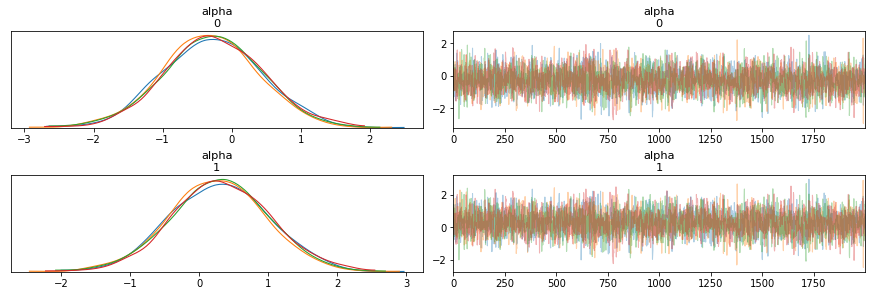

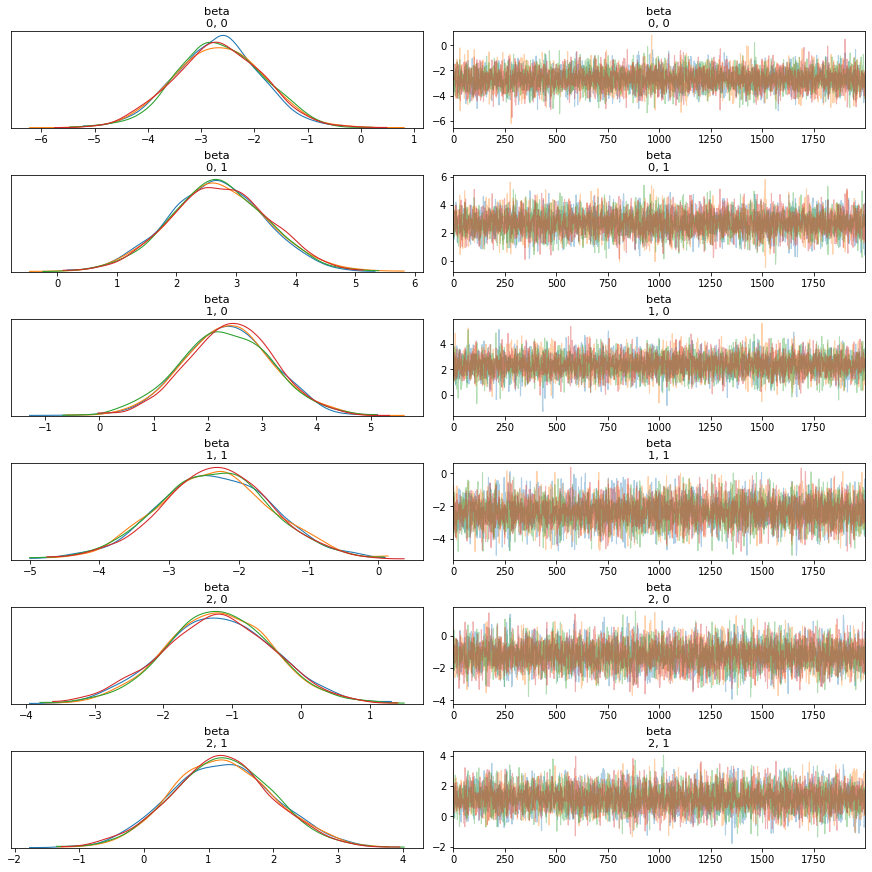

In [78]:
nuts=model_mcmc('NUTS')

In [79]:
model_mclass

In [80]:
df_results_r1.tail()

model_name sampling/VI_method  \
1             Logistic Regression-tain/test dataste                 NA   
2             Logistic Regression-tain/test dataste              Slice   
3             Logistic Regression-tain/test dataste              Slice   
4             Logistic Regression-tain/test dataste              Slice   
5  NUTS MLR-standard scalar-train/test datastet (S)               NUTS   

   Accuracy_train  AUC-ROC_train  Accuracy_test  AUC-ROC_test  \
1            0.66           0.74           0.66          0.73   
2            0.71           0.79           0.53          0.67   
3            0.71           0.79           0.53          0.66   
4            0.69           0.76           0.63          0.70   
5            0.69           0.76           0.68          0.75   

                                  model_details  
1                          LogisticRegression()  
2  <pymc3.model.Model object at 0x7fd7dc44b890>  
3  <pymc3.model.Model object at 0x7fd79fa43f90>  
4  <pymc3.model.Model object at 0x7fd79cce5850>  
5  <pymc3.model.Model object at 0x7fd7a177df90>

## HMC

Multiprocess sampling (4 chains in 4 jobs)
HamiltonianMC: [beta, alpha]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 25 seconds.
The acceptance probability does not match the target. It is 0.7952766813815059, but should be close to 0.65. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.7677371281191315, but should be close to 0.65. Try to increase the number of tuning steps.


Logistic Regression AUC-ROC :  0.757451768090066
Logistic Regression accuracy :  0.6919254658385093
Logistic Regression accuracy for test data :  0.6791907514450867
Logistic Regression AUC-ROC for test data :  0.7488776467435003


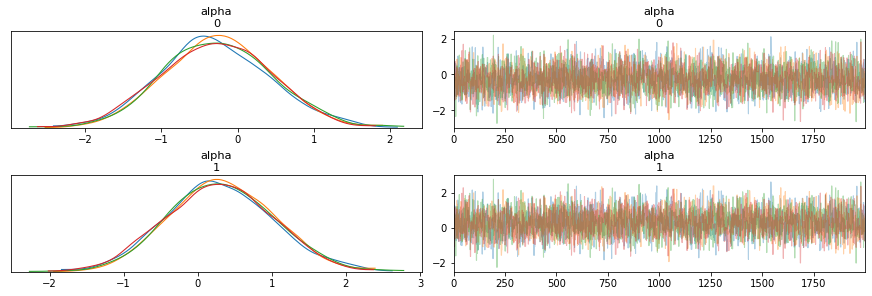

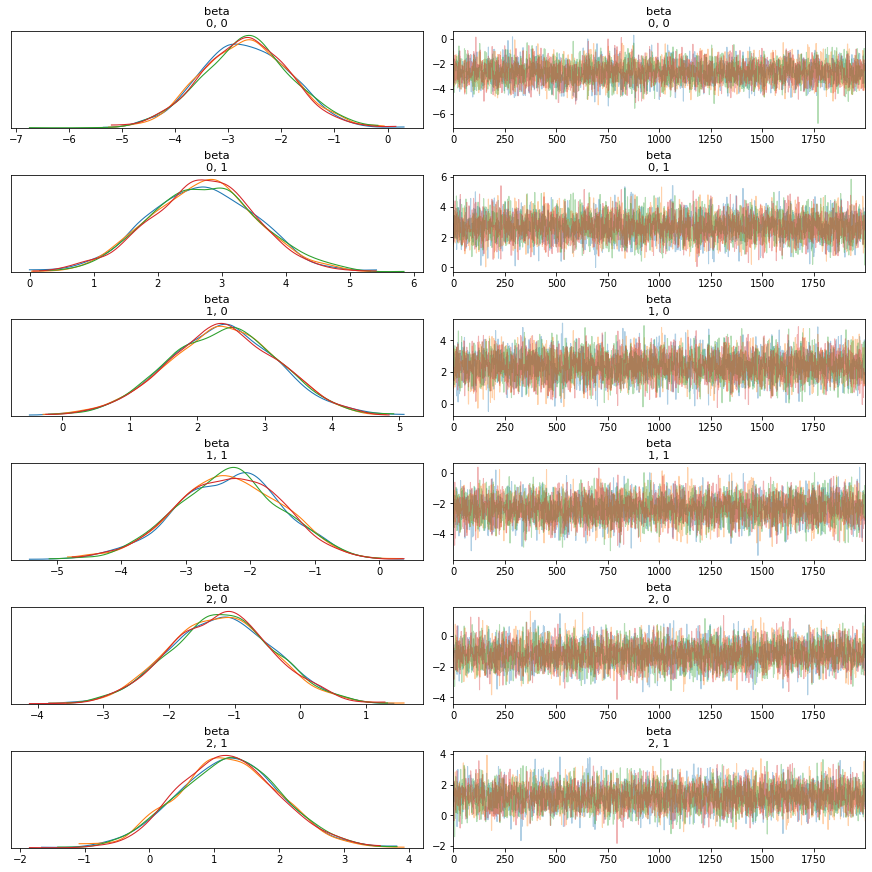

In [81]:
hmc=model_mcmc('HMC')

In [82]:
model_mclass

## Metrolpis

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [beta]
>Metropolis: [alpha]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 2 seconds.
The rhat statistic is larger than 1.2 for some parameters.
The estimated number of effective samples is smaller than 200 for some parameters.


Logistic Regression AUC-ROC :  0.7565838416902247
Logistic Regression accuracy :  0.6869565217391305
Logistic Regression accuracy for test data :  0.6589595375722543
Logistic Regression AUC-ROC for test data :  0.7336672473867596


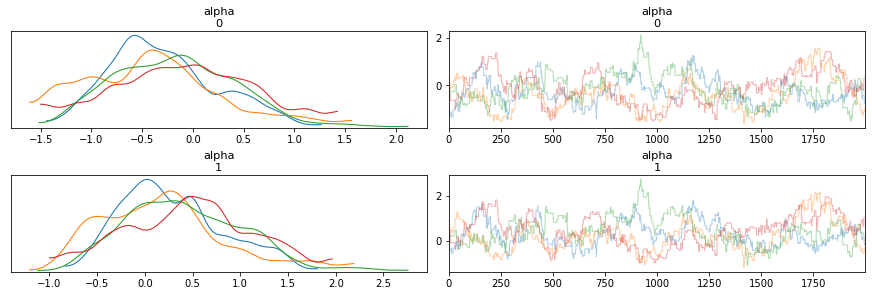

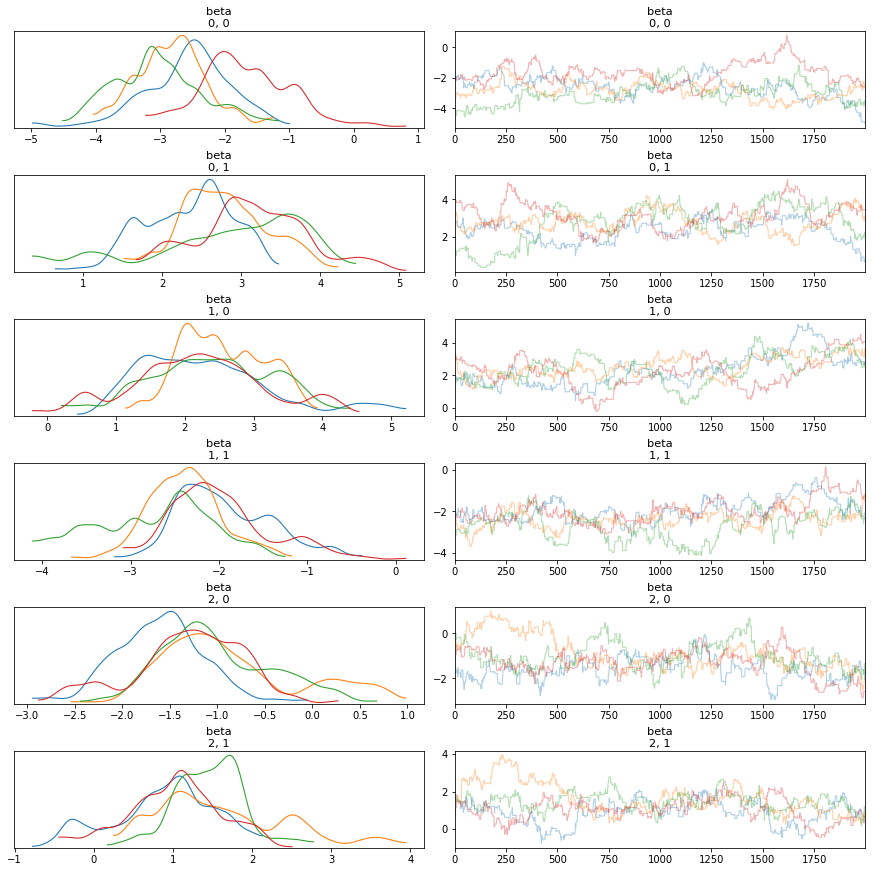

In [83]:
metrolpis=model_mcmc('metropolis')

In [84]:
model_mclass

In [85]:
df_results_r1.tail()

model_name sampling/VI_method  \
3              Logistic Regression-tain/test dataste              Slice   
4              Logistic Regression-tain/test dataste              Slice   
5   NUTS MLR-standard scalar-train/test datastet (S)               NUTS   
6    HMC MLR-standard scalar-train/test datastet (S)                HMC   
7  metropolis MLR-standard scalar-train/test data...         metropolis   

   Accuracy_train  AUC-ROC_train  Accuracy_test  AUC-ROC_test  \
3            0.71           0.79           0.53          0.66   
4            0.69           0.76           0.63          0.70   
5            0.69           0.76           0.68          0.75   
6            0.69           0.76           0.68          0.75   
7            0.69           0.76           0.66          0.73   

                                  model_details  
3  <pymc3.model.Model object at 0x7fd79fa43f90>  
4  <pymc3.model.Model object at 0x7fd79cce5850>  
5  <pymc3.model.Model object at 0x7fd7a177df90>  
6  <pymc3.model.Model object at 0x7fd79fa6e550>  
7  <pymc3.model.Model object at 0x7fd7a8a86b50>

## Slice

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Slice: [beta]
>Slice: [alpha]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 25 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


Logistic Regression AUC-ROC :  0.7588714477012349
Logistic Regression accuracy :  0.6919254658385093
Logistic Regression accuracy for test data :  0.6242774566473989
Logistic Regression AUC-ROC for test data :  0.6957082551594747


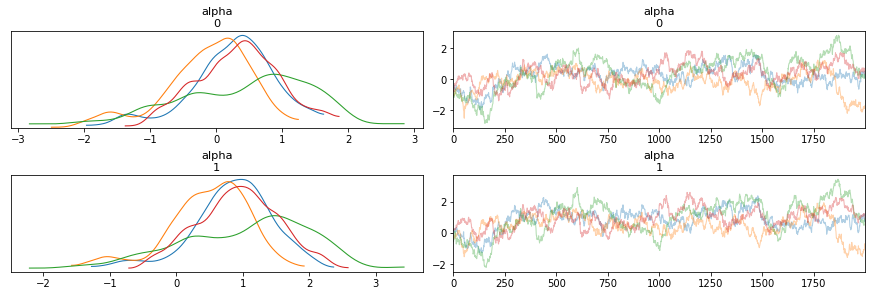

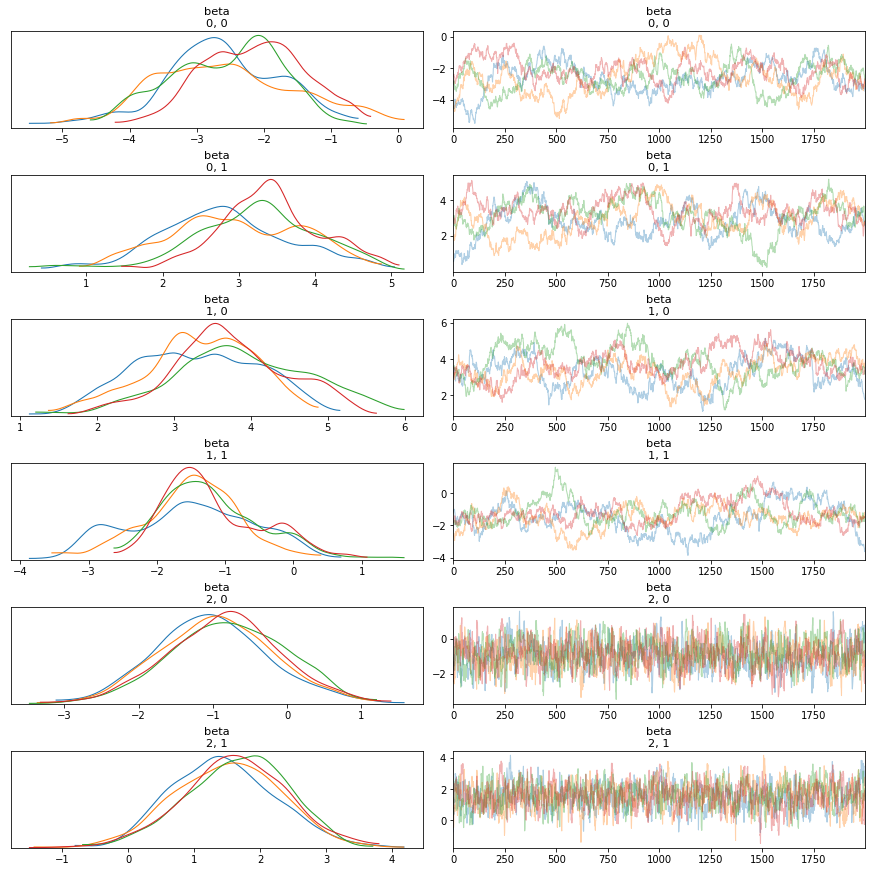

In [86]:
slice= model_mcmc('slice')

# Variational Inference Methods

## ADVI

for VI


Finished [100%]: Average Loss = 530.85


Logistic Regression AUC-ROC :  0.6986993502950949
Logistic Regression accuracy :  0.6186335403726708
Logistic Regression accuracy for test data :  0.630057803468208
Logistic Regression AUC-ROC for test data :  0.6930615116590726


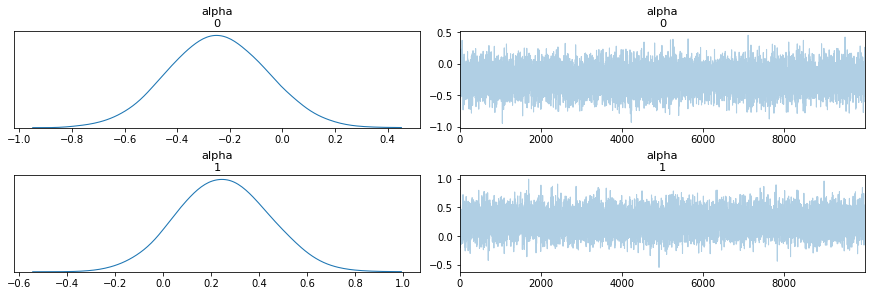

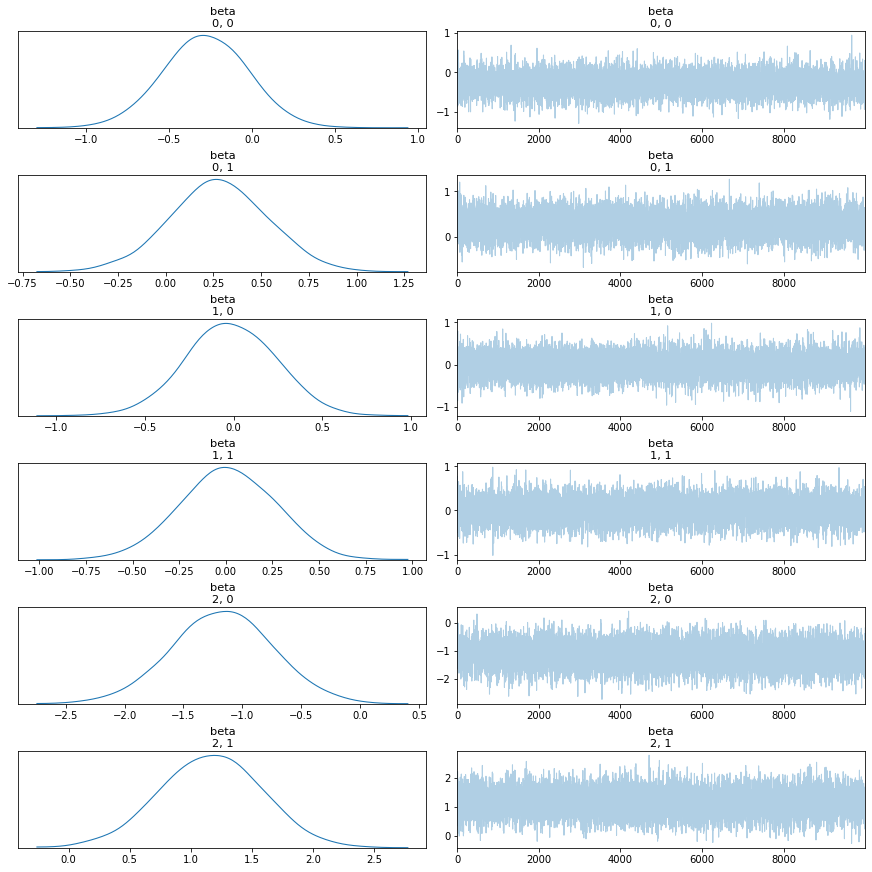

In [87]:
advi=model_vi('advi')

## fullrank advi

for VI


Finished [100%]: Average Loss = 499.05


Logistic Regression AUC-ROC :  0.7142476318008233
Logistic Regression accuracy :  0.6335403726708074
Logistic Regression accuracy for test data :  0.638728323699422
Logistic Regression AUC-ROC for test data :  0.7065632538193515


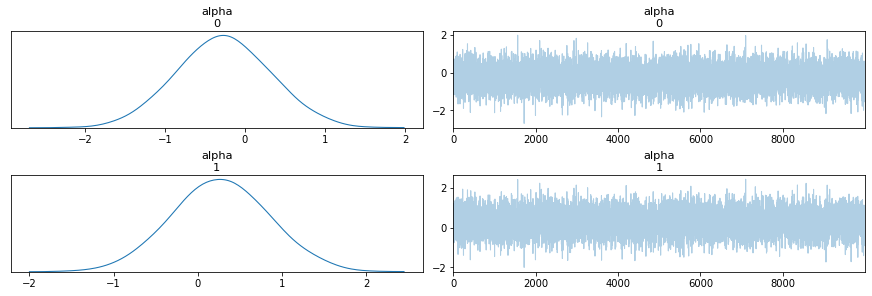

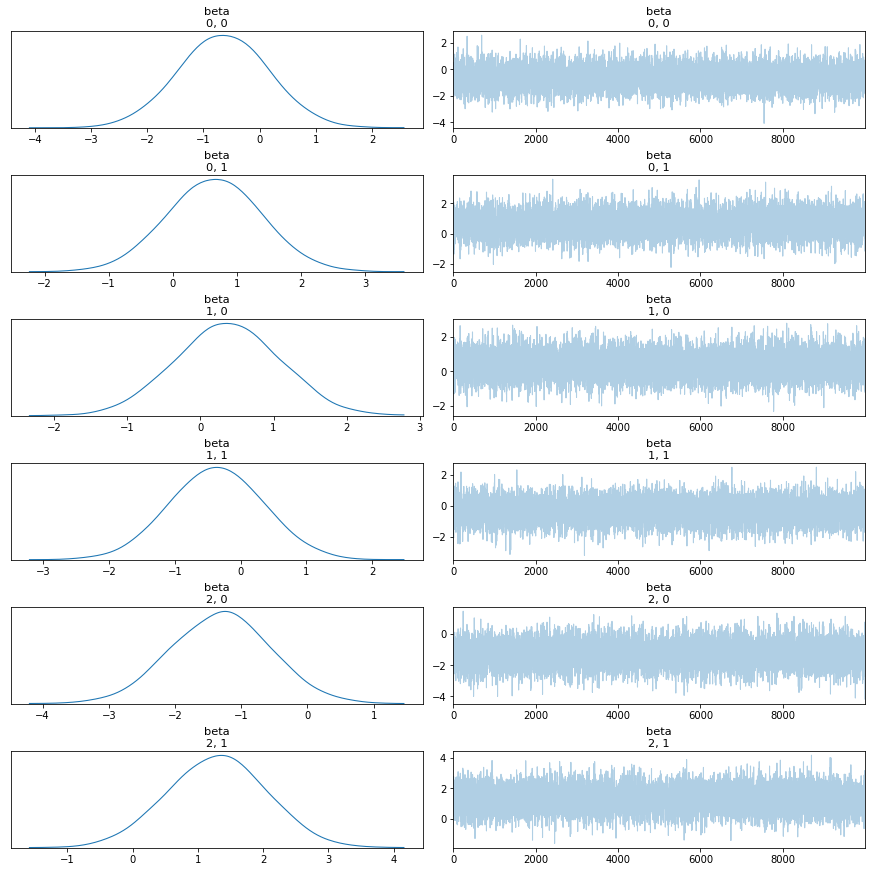

In [88]:
fr_advi=model_vi('fullrank_advi')

## svgd

for VI


Logistic Regression AUC-ROC :  0.7451458116351733
Logistic Regression accuracy :  0.6683229813664596
Logistic Regression accuracy for test data :  0.6676300578034682
Logistic Regression AUC-ROC for test data :  0.729345349772179


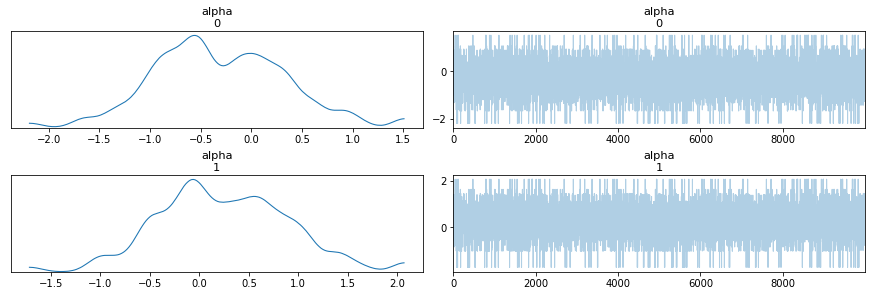

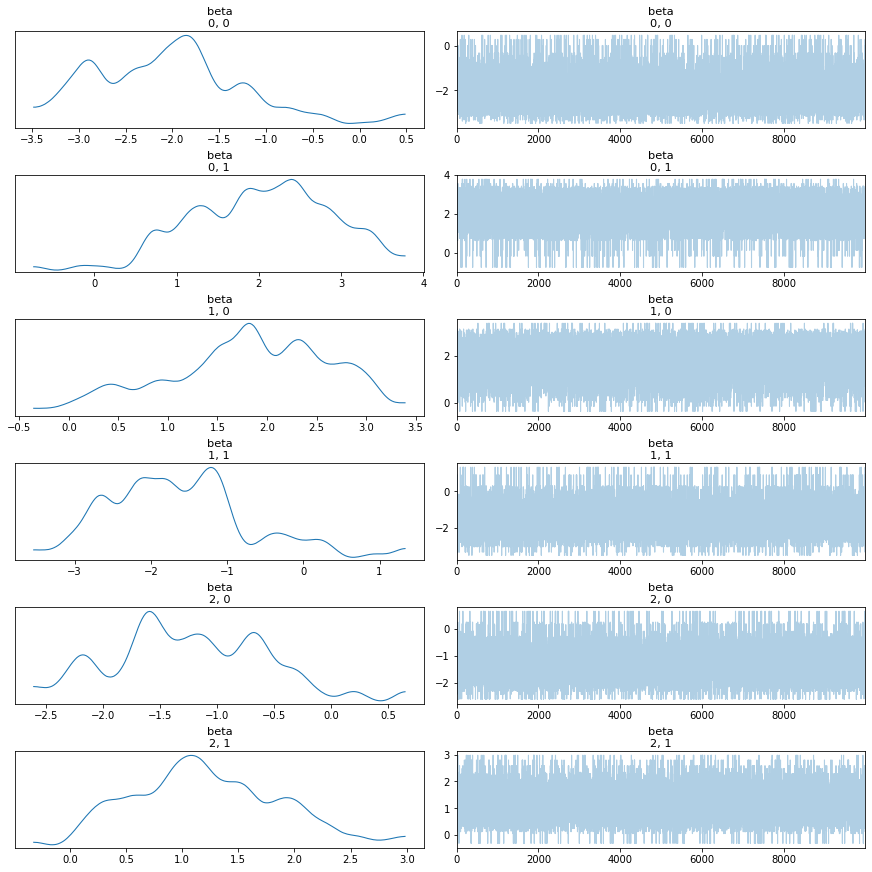

In [89]:
svgd= model_vi('svgd')

In [90]:
pd.set_option('display.max_colwidth', None)
# pd.set_option('display.max_columns', 500)

In [91]:
df_results_r1

model_name sampling/VI_method  \
0                    Logistic Regression-tain/test dataste                 NA   
1                    Logistic Regression-tain/test dataste                 NA   
2                    Logistic Regression-tain/test dataste              Slice   
3                    Logistic Regression-tain/test dataste              Slice   
4                    Logistic Regression-tain/test dataste              Slice   
5         NUTS MLR-standard scalar-train/test datastet (S)               NUTS   
6          HMC MLR-standard scalar-train/test datastet (S)                HMC   
7   metropolis MLR-standard scalar-train/test datastet (S)         metropolis   
8        slice MLR-standard scalar-train/test datastet (S)              slice   
9             advi MLR-Robust-Nuts-train/test datastet (G)               advi   
10   fullrank_advi MLR-Robust-Nuts-train/test datastet (G)      fullrank_advi   
11            svgd MLR-Robust-Nuts-train/test datastet (G)               svgd   

    Accuracy_train  AUC-ROC_train  Accuracy_test  AUC-ROC_test  \
0             0.72           0.78           0.72          0.78   
1             0.66           0.74           0.66          0.73   
2             0.71           0.79           0.53          0.67   
3             0.71           0.79           0.53          0.66   
4             0.69           0.76           0.63          0.70   
5             0.69           0.76           0.68          0.75   
6             0.69           0.76           0.68          0.75   
7             0.69           0.76           0.66          0.73   
8             0.69           0.76           0.62          0.70   
9             0.62           0.70           0.63          0.69   
10            0.63           0.71           0.64          0.71   
11            0.67           0.75           0.67          0.73   

                                   model_details  
0                           LogisticRegression()  
1                           LogisticRegression()  
2   <pymc3.model.Model object at 0x7fd7dc44b890>  
3   <pymc3.model.Model object at 0x7fd79fa43f90>  
4   <pymc3.model.Model object at 0x7fd79cce5850>  
5   <pymc3.model.Model object at 0x7fd7a177df90>  
6   <pymc3.model.Model object at 0x7fd79fa6e550>  
7   <pymc3.model.Model object at 0x7fd7a8a86b50>  
8   <pymc3.model.Model object at 0x7fd7e30b6990>  
9   <pymc3.model.Model object at 0x7fd7e30d5f90>  
10  <pymc3.model.Model object at 0x7fd8212ff710>  
11  <pymc3.model.Model object at 0x7fd7a8836150>

In [92]:
df_results_r1

model_name sampling/VI_method  \
0                    Logistic Regression-tain/test dataste                 NA   
1                    Logistic Regression-tain/test dataste                 NA   
2                    Logistic Regression-tain/test dataste              Slice   
3                    Logistic Regression-tain/test dataste              Slice   
4                    Logistic Regression-tain/test dataste              Slice   
5         NUTS MLR-standard scalar-train/test datastet (S)               NUTS   
6          HMC MLR-standard scalar-train/test datastet (S)                HMC   
7   metropolis MLR-standard scalar-train/test datastet (S)         metropolis   
8        slice MLR-standard scalar-train/test datastet (S)              slice   
9             advi MLR-Robust-Nuts-train/test datastet (G)               advi   
10   fullrank_advi MLR-Robust-Nuts-train/test datastet (G)      fullrank_advi   
11            svgd MLR-Robust-Nuts-train/test datastet (G)               svgd   

    Accuracy_train  AUC-ROC_train  Accuracy_test  AUC-ROC_test  \
0             0.72           0.78           0.72          0.78   
1             0.66           0.74           0.66          0.73   
2             0.71           0.79           0.53          0.67   
3             0.71           0.79           0.53          0.66   
4             0.69           0.76           0.63          0.70   
5             0.69           0.76           0.68          0.75   
6             0.69           0.76           0.68          0.75   
7             0.69           0.76           0.66          0.73   
8             0.69           0.76           0.62          0.70   
9             0.62           0.70           0.63          0.69   
10            0.63           0.71           0.64          0.71   
11            0.67           0.75           0.67          0.73   

                                   model_details  
0                           LogisticRegression()  
1                           LogisticRegression()  
2   <pymc3.model.Model object at 0x7fd7dc44b890>  
3   <pymc3.model.Model object at 0x7fd79fa43f90>  
4   <pymc3.model.Model object at 0x7fd79cce5850>  
5   <pymc3.model.Model object at 0x7fd7a177df90>  
6   <pymc3.model.Model object at 0x7fd79fa6e550>  
7   <pymc3.model.Model object at 0x7fd7a8a86b50>  
8   <pymc3.model.Model object at 0x7fd7e30b6990>  
9   <pymc3.model.Model object at 0x7fd7e30d5f90>  
10  <pymc3.model.Model object at 0x7fd8212ff710>  
11  <pymc3.model.Model object at 0x7fd7a8836150>

In [93]:
df_results_r1_a=df_results_r1.sort_values('Accuracy_test',ascending=False)

df_results_r1_a


model_name sampling/VI_method  \
0                    Logistic Regression-tain/test dataste                 NA   
5         NUTS MLR-standard scalar-train/test datastet (S)               NUTS   
6          HMC MLR-standard scalar-train/test datastet (S)                HMC   
11            svgd MLR-Robust-Nuts-train/test datastet (G)               svgd   
7   metropolis MLR-standard scalar-train/test datastet (S)         metropolis   
1                    Logistic Regression-tain/test dataste                 NA   
10   fullrank_advi MLR-Robust-Nuts-train/test datastet (G)      fullrank_advi   
4                    Logistic Regression-tain/test dataste              Slice   
9             advi MLR-Robust-Nuts-train/test datastet (G)               advi   
8        slice MLR-standard scalar-train/test datastet (S)              slice   
2                    Logistic Regression-tain/test dataste              Slice   
3                    Logistic Regression-tain/test dataste              Slice   

    Accuracy_train  AUC-ROC_train  Accuracy_test  AUC-ROC_test  \
0             0.72           0.78           0.72          0.78   
5             0.69           0.76           0.68          0.75   
6             0.69           0.76           0.68          0.75   
11            0.67           0.75           0.67          0.73   
7             0.69           0.76           0.66          0.73   
1             0.66           0.74           0.66          0.73   
10            0.63           0.71           0.64          0.71   
4             0.69           0.76           0.63          0.70   
9             0.62           0.70           0.63          0.69   
8             0.69           0.76           0.62          0.70   
2             0.71           0.79           0.53          0.67   
3             0.71           0.79           0.53          0.66   

                                   model_details  
0                           LogisticRegression()  
5   <pymc3.model.Model object at 0x7fd7a177df90>  
6   <pymc3.model.Model object at 0x7fd79fa6e550>  
11  <pymc3.model.Model object at 0x7fd7a8836150>  
7   <pymc3.model.Model object at 0x7fd7a8a86b50>  
1                           LogisticRegression()  
10  <pymc3.model.Model object at 0x7fd8212ff710>  
4   <pymc3.model.Model object at 0x7fd79cce5850>  
9   <pymc3.model.Model object at 0x7fd7e30d5f90>  
8   <pymc3.model.Model object at 0x7fd7e30b6990>  
2   <pymc3.model.Model object at 0x7fd7dc44b890>  
3   <pymc3.model.Model object at 0x7fd79fa43f90>

In [94]:
df_results_r1_a=df_results_r1.sort_values('AUC-ROC_test',ascending=False)

df_results_r1_a

model_name sampling/VI_method  \
0                    Logistic Regression-tain/test dataste                 NA   
5         NUTS MLR-standard scalar-train/test datastet (S)               NUTS   
6          HMC MLR-standard scalar-train/test datastet (S)                HMC   
7   metropolis MLR-standard scalar-train/test datastet (S)         metropolis   
1                    Logistic Regression-tain/test dataste                 NA   
11            svgd MLR-Robust-Nuts-train/test datastet (G)               svgd   
10   fullrank_advi MLR-Robust-Nuts-train/test datastet (G)      fullrank_advi   
4                    Logistic Regression-tain/test dataste              Slice   
8        slice MLR-standard scalar-train/test datastet (S)              slice   
9             advi MLR-Robust-Nuts-train/test datastet (G)               advi   
2                    Logistic Regression-tain/test dataste              Slice   
3                    Logistic Regression-tain/test dataste              Slice   

    Accuracy_train  AUC-ROC_train  Accuracy_test  AUC-ROC_test  \
0             0.72           0.78           0.72          0.78   
5             0.69           0.76           0.68          0.75   
6             0.69           0.76           0.68          0.75   
7             0.69           0.76           0.66          0.73   
1             0.66           0.74           0.66          0.73   
11            0.67           0.75           0.67          0.73   
10            0.63           0.71           0.64          0.71   
4             0.69           0.76           0.63          0.70   
8             0.69           0.76           0.62          0.70   
9             0.62           0.70           0.63          0.69   
2             0.71           0.79           0.53          0.67   
3             0.71           0.79           0.53          0.66   

                                   model_details  
0                           LogisticRegression()  
5   <pymc3.model.Model object at 0x7fd7a177df90>  
6   <pymc3.model.Model object at 0x7fd79fa6e550>  
7   <pymc3.model.Model object at 0x7fd7a8a86b50>  
1                           LogisticRegression()  
11  <pymc3.model.Model object at 0x7fd7a8836150>  
10  <pymc3.model.Model object at 0x7fd8212ff710>  
4   <pymc3.model.Model object at 0x7fd79cce5850>  
8   <pymc3.model.Model object at 0x7fd7e30b6990>  
9   <pymc3.model.Model object at 0x7fd7e30d5f90>  
2   <pymc3.model.Model object at 0x7fd7dc44b890>  
3   <pymc3.model.Model object at 0x7fd79fa43f90>

In [95]:
# save the final data
df_results_r1.to_csv('df_results_c4.csv',index=False)

## Conclusion

#### We can see that both MCMC and VI models have performed better 
#### Also we see the performance of MCMC is at par and a bit better than normal Logistic Regression
#### NUTS Sampling method and SVGD methid gave best result in MCMC model